In [1]:
SAVE_FIG = True #True # False

In [2]:
# Change directory
import os
results_path = '/data/scratch/ahw696/LearnedRadonFilters-master_2022_11_18'
os.chdir(results_path)

In [3]:
# Check new working directory
print(os.getcwd())

/data/scratch/ahw696/LearnedRadonFilters-master_2022_11_18


In [4]:
import tensorboard

In [5]:
%load_ext tensorboard
os.environ['TENSORBOARD_BINARY'] = '/data/home/ahw696/py3107_MBe_MM_MBu2022/bin/tensorboard'

In [6]:
# %tensorboard --logdir /data/scratch/ahw696/LearnedRadonFilters-master_2022_11_18

# # %tensorboard --logdir /data/scratch/ahw696/LearnedRadonFilters-master_2022_11_18 --host "0.0.0.0" --port 6006
# # I tried with:
# #    pip uninstall -y tensorboard tb-nightly
# #    pip install -U tb-nightly
# # but it is not working yet

In [7]:
# from tensorboard import notebook
# notebook.list() # View open TensorBoard instances

In [8]:
# !kill 11838 #put pid number here

In [9]:
import torch

/data/home/ahw696/py3107_MBe_MM_MBu2022/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
def number_of_elements(number_of_pixels: int):
    return ceil((2*ceil(number_of_pixels/(2**(0.5)))+1)/2)

def load_variables(epochs: int, img_size: int, noise_level: float, model: str, seed=None, results_folder='./18nov_volta'):
    dir = f"{results_folder}/epochs={epochs}, dataset.img_size={img_size}, noise_level={noise_level}, model={model}, model.initialization=zeros"
    if seed is not None:
        dir += f', seed={seed}'
    loaded_pi = torch.load(f"{dir}/pi.pt", map_location=torch.device('cpu'))
    loaded_gamma = torch.load(f"{dir}/gamma.pt", map_location=torch.device('cpu'))
    loaded_delta = torch.load(f"{dir}/delta.pt", map_location=torch.device('cpu'))


    loaded_pi = torch.nn.utils.parameters_to_vector(loaded_pi).view(loaded_pi.shape).cpu()
    loaded_gamma = torch.nn.utils.parameters_to_vector(loaded_gamma).view(loaded_gamma.shape).cpu()
    loaded_delta = torch.nn.utils.parameters_to_vector(loaded_delta).view(loaded_delta.shape).cpu()
    # loaded_count = torch.load(f"{dir}/count.pt", map_location=torch.device('cpu'))

    #if "learned" in model:
    #    loaded_pi /= 5
    #    loaded_gamma /= 5
    #    loaded_delta /= 5
    #    # loaded_count /= 5
    

    loaded_g = torch.load(f"{dir}/coefficients.pt", map_location=torch.device('cpu')).detach().cpu()
    return loaded_pi, loaded_gamma, loaded_delta, loaded_g

In [11]:
epochs = 3 # 3 , 20 
img_size = 32 # 32,64,96,128,256,384,768
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235

aus = load_variables(epochs, img_size, noise_level, model, seed)

In [12]:
len(aus)

4

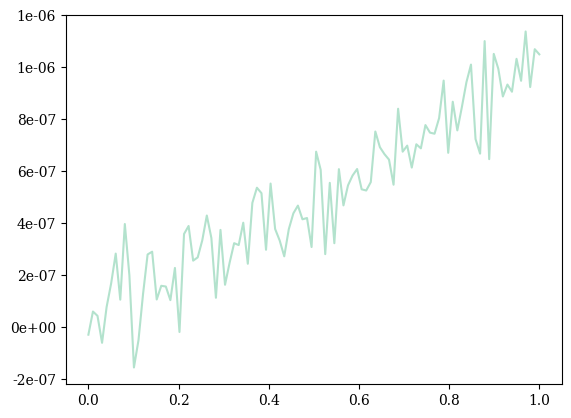

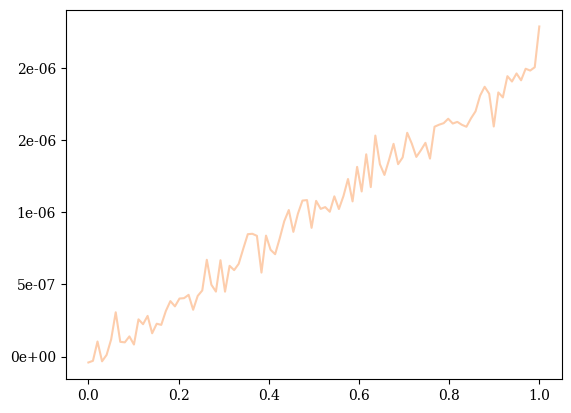

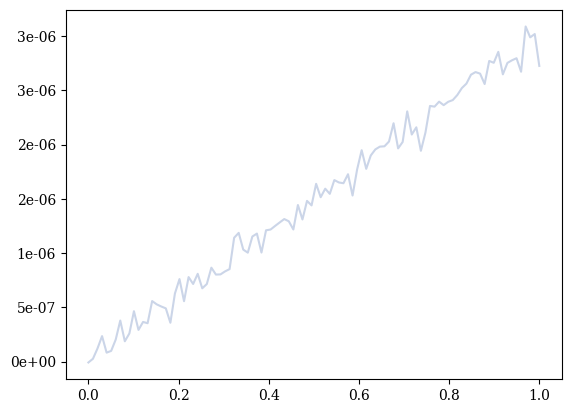

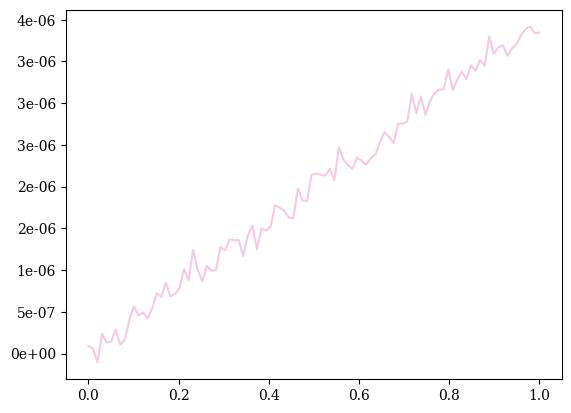

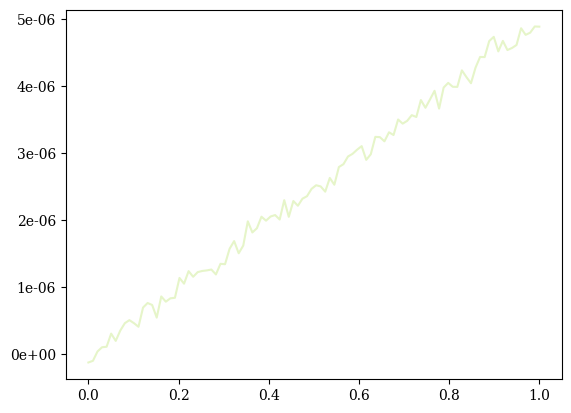

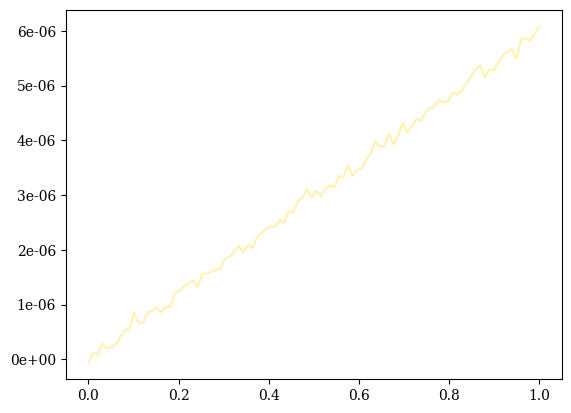

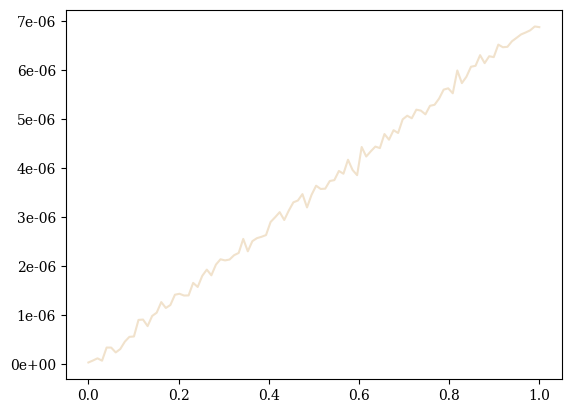

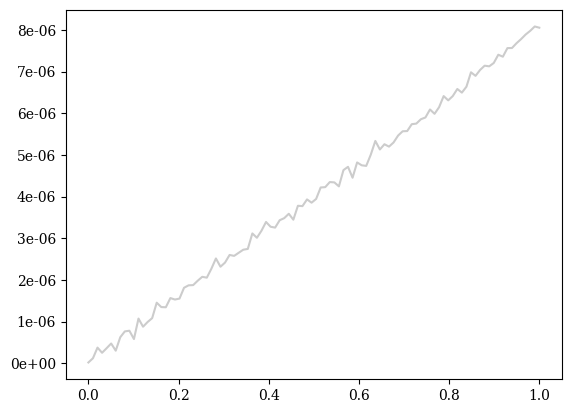

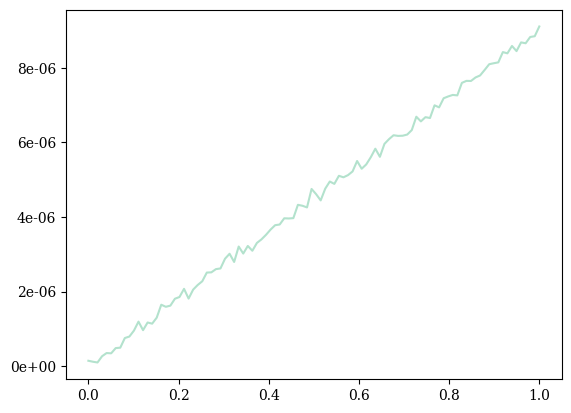

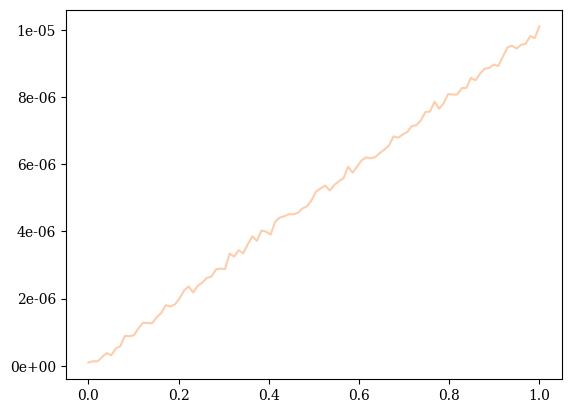

In [13]:
#import torch
import matplotlib.pyplot as plt
from math import ceil

# Update from Samira so my plots will look like the other authors' plots
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif"
})

import numpy as np
# Update from Alex
import matplotlib.ticker

figure = plt.figure()
colormap = matplotlib.colormaps["Pastel2"] #The default colors are in "tab10"
for i in range(10):
    color = colormap(i%colormap.N)
    plt.plot(np.linspace(0.0, 1.0, 100), np.random.randn(100)*1e-7+np.linspace(0.0, 1.0*(i+1.0), 100)*1e-6, color=color)
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
    plt.show()

In [14]:
# Removed this on 3 Dec 2022
# plt.rcParams['text.usetex'] = False

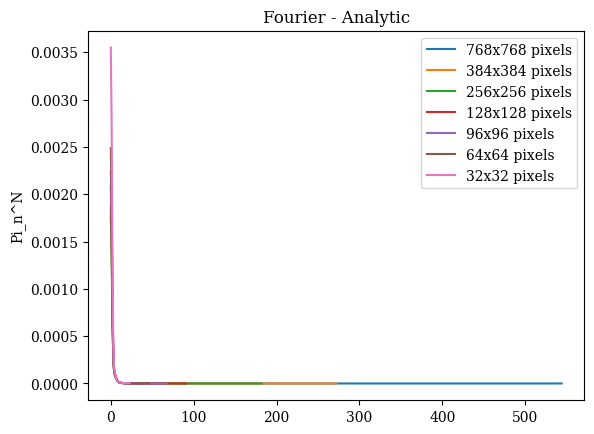

In [15]:
# Fourier - Analytic \Pi
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(256)
for pixels in [768, 384, 256, 128, 96, 64, 32]:
    #plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), load_variables(epochs, img_size, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    plt.plot(load_variables(epochs, pixels, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    aus.append(load_variables(epochs, pixels, noise_level, model, seed)[0][0][0])
plt.title("Fourier - Analytic")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.show()


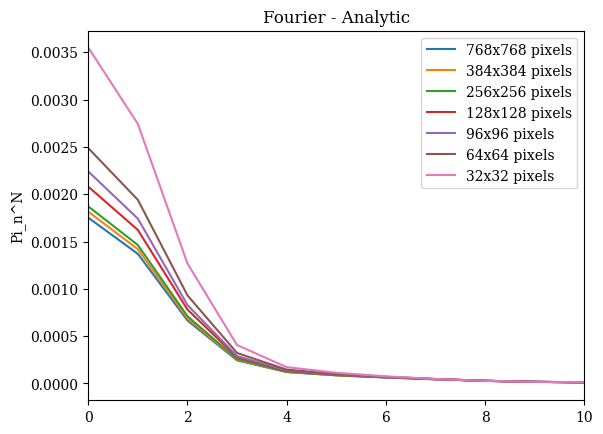

In [16]:
# Fourier - Analytic \Pi
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(256)
for pixels in [768, 384, 256, 128, 96, 64, 32]:
    #plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), load_variables(epochs, img_size, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    plt.plot(load_variables(epochs, pixels, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    aus.append(load_variables(epochs, pixels, noise_level, model, seed)[0][0][0])
plt.title("Fourier - Analytic")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(0,10)
plt.show()


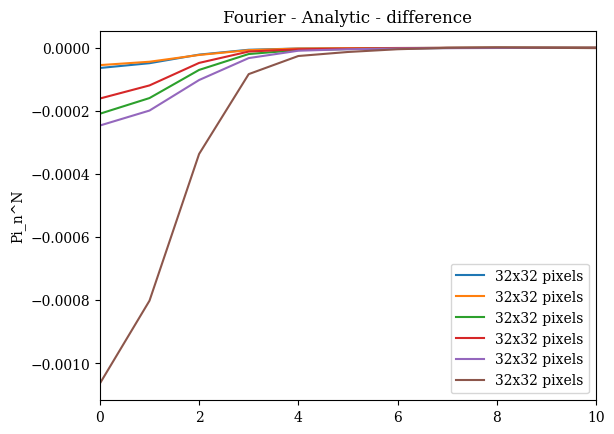

In [17]:
# Fourier - Analytic \Pi
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)
for pixels_1, pixels_2 in [[768, 384], [384, 256], [256, 128], [128, 96], [96, 64], [64,32]]:
    #plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), load_variables(epochs, img_size, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    plt.plot(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x], label=f'{pixels}x{pixels} pixels')
    aus.append(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x])
plt.title("Fourier - Analytic - difference")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(0,10)
plt.show()


In [18]:
len(aus)

6

In [19]:
# torch.Tensor([[aus[0]][aus[1]]])

In [20]:
aus[0].shape

torch.Size([24])

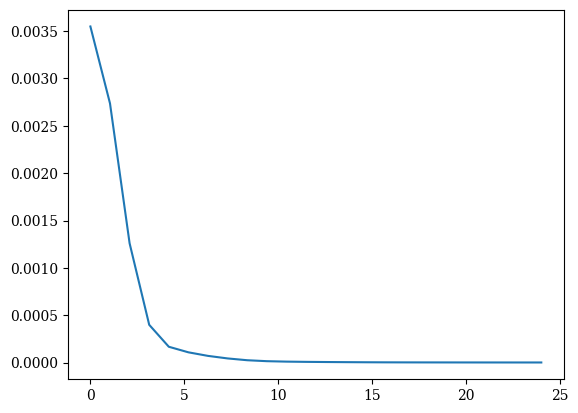

In [21]:
    normalisation_factor = 1
    plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0], dim=0)*normalisation_factor, label=f'{pixels}x{pixels} pixels')

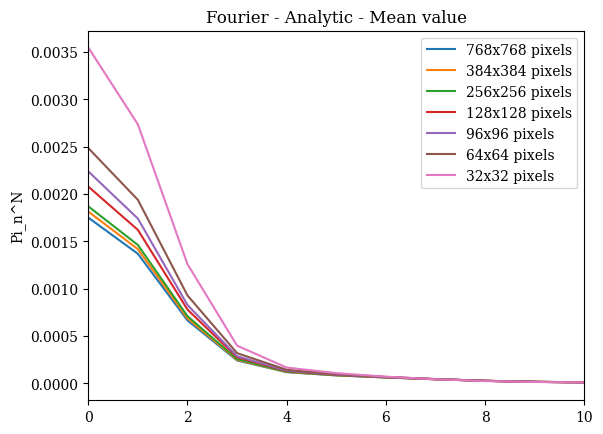

In [22]:
# Fourier - Analytic \Pi
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)
for pixels in [768, 384, 256, 128, 96, 64, 32]:
    normalisation_factor = 1
    #plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), load_variables(epochs, img_size, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    plt.plot(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0],dim=0), label=f'{pixels}x{pixels} pixels')
    #aus.append(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x])
plt.title("Fourier - Analytic - Mean value")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(0,10)
plt.show()


In [23]:
model = 'svd'
load_variables(epochs, pixels, noise_level, model, seed)[0].shape

torch.Size([1024])

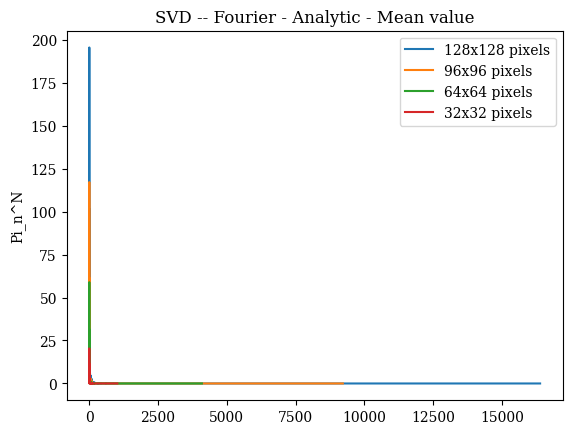

In [24]:
# SVD -- Fourier - Analytic \Pi
# Here it makes no sense to have a "mean"

aus = []
epochs = 20 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'svd' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)
for pixels in [128, 96, 64, 32]:
    normalisation_factor = 1
    plt.plot(load_variables(epochs, pixels, noise_level, model, seed)[0], label=f'{pixels}x{pixels} pixels')
    # NO! --> #plt.plot(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0],dim=0), label=f'{pixels}x{pixels} pixels')

plt.title("SVD -- Fourier - Analytic - Mean value")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
# plt.xlim(0,10)
plt.show()

model = 'filter' # 'filter' , 'svd'

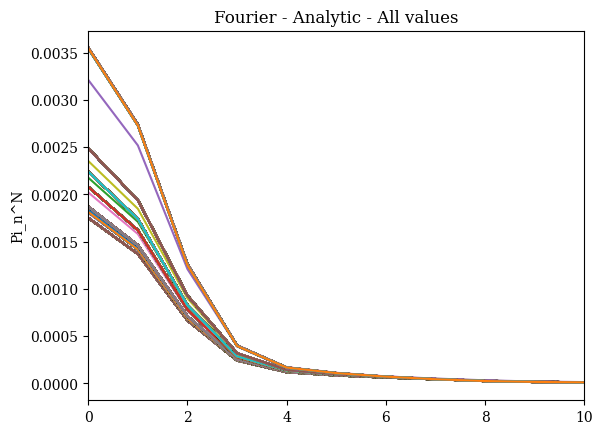

In [25]:
# Fourier - Analytic \Pi
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)
for pixels in [768, 384, 256, 128, 96, 64, 32]:
    normalisation_factor = 1
    #plt.plot(torch.linspace(0, max_x, number_of_elements(pixels)), load_variables(epochs, img_size, noise_level, model, seed)[0][:][0], label=f'{pixels}x{pixels} pixels')
    plt.plot(load_variables(epochs, pixels, noise_level, model, seed)[0].t()) #, label=f'{pixels}x{pixels} pixels')
    #aus.append(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x])
plt.title("Fourier - Analytic - All values")
# plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(0,10)
plt.show()


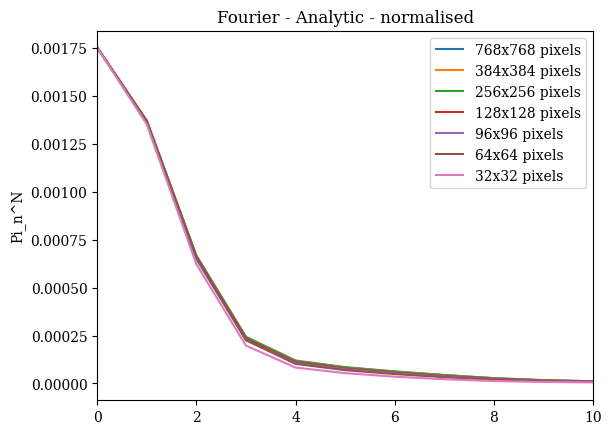

In [26]:
# Fourier - Analytic \Pi - normalised
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)

fig, ax = plt.subplots()

a0_768 = torch.mean(load_variables(epochs, 768, noise_level, model, seed)[0], dim=0)[0]
v_normalisation_factor = []
v_pi_0 = []

for pixels in [768, 384, 256, 128, 96, 64, 32]:
    normalisation_factor = a0_768 / torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0], dim=0)[0]
    v_pi_0.append(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0], dim=0)[0])
    v_normalisation_factor.append(normalisation_factor)
    plt.plot(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0],dim=0)*normalisation_factor, label=f'{pixels}x{pixels} pixels')
    #aus.append(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x])
plt.title("Fourier - Analytic - normalised")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(0,10)
plt.show()


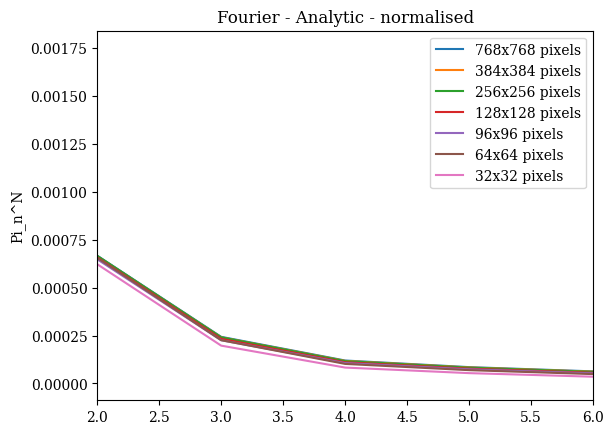

In [27]:
# Fourier - Analytic \Pi - normalised - zoom in
aus = []
epochs = 3 # 3 , 20 
img_size = 32 # [32,64,96,128,256,384,768]
noise_level =  0.0 # 0.0 , 0.005 , 0.01 , 0.015
model = 'filter' # 'filter' , 'svd'
seed = None # None , 1235
max_x = number_of_elements(32)

fig, ax = plt.subplots()

a0_768 = torch.mean(load_variables(epochs, 768, noise_level, model, seed)[0], dim=0)[0]
v_normalisation_factor = []
v_pi_0 = []

for pixels in [768, 384, 256, 128, 96, 64, 32]:
    normalisation_factor = a0_768 / torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0], dim=0)[0]
    v_pi_0.append(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0], dim=0)[0])
    v_normalisation_factor.append(normalisation_factor)
    plt.plot(torch.mean(load_variables(epochs, pixels, noise_level, model, seed)[0],dim=0)*normalisation_factor, label=f'{pixels}x{pixels} pixels')
    #aus.append(load_variables(epochs, pixels_1, noise_level, model, seed)[0][:][0][:max_x] - load_variables(epochs, pixels_2, noise_level, model, seed)[0][:][0][:max_x])
plt.title("Fourier - Analytic - normalised")
plt.legend()
plt.ylabel("Pi_n^N")
#plt.ylabel(r"$\Pi_n^N$")
plt.xlim(2,6)
plt.show()


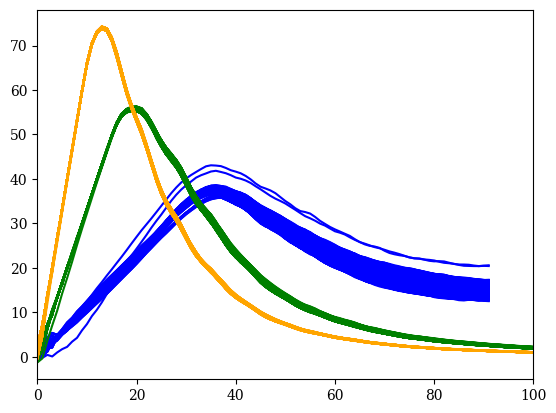

In [28]:
# [32,64,96,128,256,384,768]

# Coefficients - 3 epochs

epochs=20
noise_level=0.0
plt.plot(load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='b')
plt.plot(load_variables(epochs, 384, noise_level, model, seed)[3].t(), color='green')
plt.plot(load_variables(epochs, 768, noise_level, model, seed)[3].t(), color='orange')
plt.xlim(0,100)

plt.show()

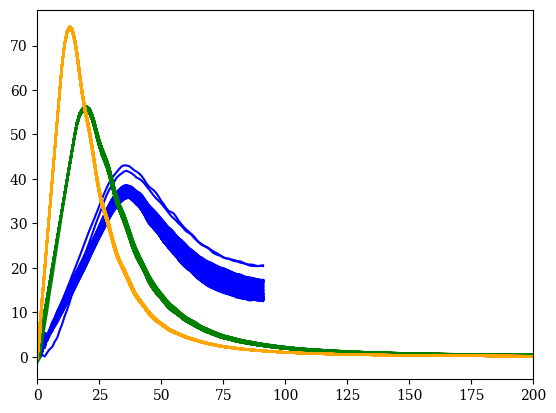

In [29]:
# [32,64,96,128,256,384,768]

# Coefficients - 20 epochs
noise_level = 0.0
epochs=20
plt.plot(load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='b')
plt.plot(load_variables(epochs, 384, noise_level, model, seed)[3].t(), color='green')
plt.plot(load_variables(epochs, 768, noise_level, model, seed)[3].t(), color='orange')
plt.xlim(0,200)

plt.show()

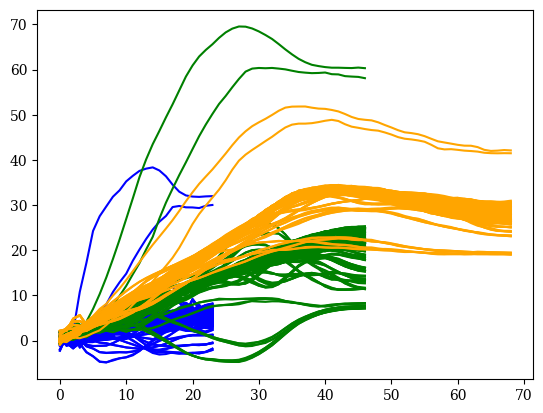

In [30]:
# [32,64,96,128,256,384,768]

# Coefficients - 3 epochs

epochs=20
plt.plot(load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b')
plt.plot(load_variables(epochs, 64, noise_level, model, seed)[3].t(), color='green')
plt.plot(load_variables(epochs, 96, noise_level, model, seed)[3].t(), color='orange')
#plt.xlim(0,100)

plt.show()

In [31]:
model

'filter'

In [32]:
noise_level = 0.005

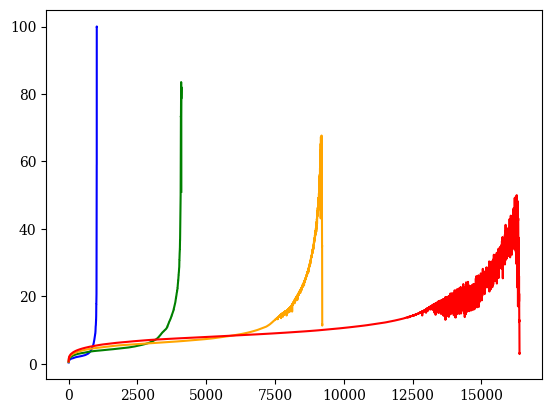

In [33]:
# [32,64,96,128,256,384,768]

# SVD -- Coefficients - 3 epochs
# (no coefficients for the pixels>128)

epochs=20
noise_level = 0.0
model = 'svd'
plt.plot(load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b')
plt.plot(load_variables(epochs, 64, noise_level, model, seed)[3].t(), color='green')
plt.plot(load_variables(epochs, 96, noise_level, model, seed)[3].t(), color='orange')
plt.plot(load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='red')
#plt.xlim(0,100)

plt.show()
model = 'filter'

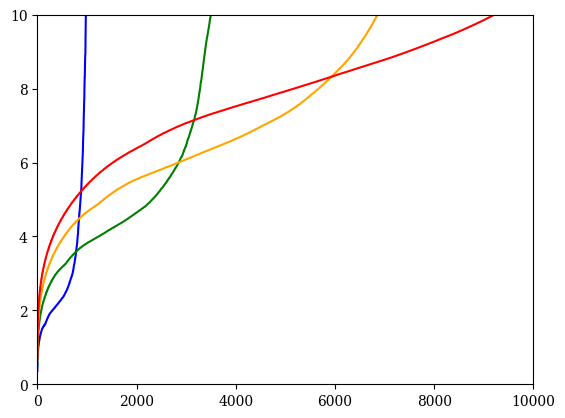

In [34]:
# [32,64,96,128,256,384,768]

# SVD -- Coefficients - 3 epochs (zoom y axis)
# (no coefficients for the pixels>128)

epochs=20
model = 'svd'
plt.plot(load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b')
plt.plot(load_variables(epochs, 64, noise_level, model, seed)[3].t(), color='green')
plt.plot(load_variables(epochs, 96, noise_level, model, seed)[3].t(), color='orange')
plt.plot(load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='red')
plt.xlim(0,10000)
plt.ylim(0,10)

plt.show()

model = 'filter'

In [35]:
def load_singular_values(img_size: int):
    dir = f'./25nov_volta/epochs=0, dataset.img_size={img_size}, noise_level=0.0, model=svd, model.initialization=zeros, training_batch_count=0, validation_batch_count=0, test_batch_count=0'
    # loaded_singular_values = torch.load(f"{dir}/singular_values.pt", map_location=torch.device('cpu'))
    return torch.load(f"{dir}/singular_values.pt", map_location=torch.device('cpu'))

In [36]:
loaded_sing_values = load_singular_values(32)

In [37]:
loaded_sing_values.shape

torch.Size([1024])

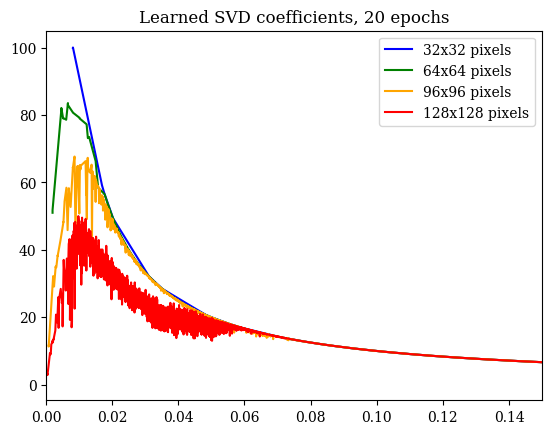

In [38]:
# [32,64,96,128,256,384,768]

# SVD -- Coefficients - 3 epochs
# (no coefficients for the pixels>128)

epochs=20
noise_level=0.0
model = 'svd'
#plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b', marker='--', label=f'32x32 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b', label=f'32x32 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='red', label=f'128x128 pixels')
plt.xlim(0,0.15)
# plt.xlim(0,0.03)
plt.legend()
plt.title("Learned SVD coefficients, 20 epochs")

plt.show()

model = 'filter'

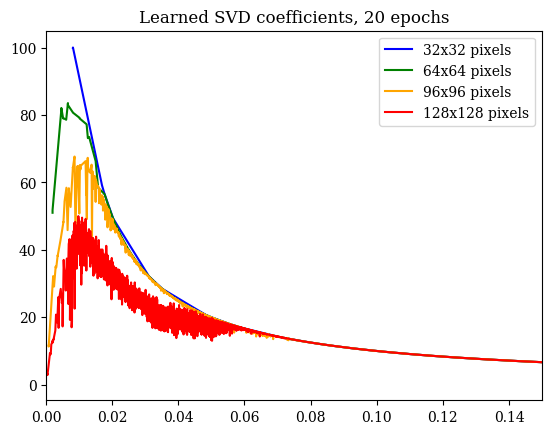

In [39]:
epochs=20
noise_level=0.0
model = 'svd'
#plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b', marker='--', label=f'32x32 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed)[3].t(), color='b', label=f'32x32 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed)[3].t(), color='red', label=f'128x128 pixels')
plt.xlim(0,0.15)
# plt.xlim(0,0.03)
plt.legend()
plt.title("Learned SVD coefficients, 20 epochs")

plt.show()

model = 'filter'

In [40]:
load_singular_values(96)

tensor([1.6046e+00, 1.0401e+00, 1.0401e+00,  ..., 2.1310e-03, 7.8634e-04,
        7.8617e-04])

In [41]:
def number_of_elements(number_of_pixels: int):
    return ceil((2*ceil(number_of_pixels/(2**(0.5)))+1)/2)

def load_variables(epochs: int, img_size: int, noise_level: float, model: str, seed=None, results_folder='./18nov_volta'):
    dir = f"{results_folder}/epochs={epochs}, dataset.img_size={img_size}, noise_level={noise_level}, model={model}, model.initialization=zeros"
    if seed is not None:
        dir += f', seed={seed}'
    loaded_pi = torch.load(f"{dir}/pi.pt", map_location=torch.device('cpu'))
    loaded_gamma = torch.load(f"{dir}/gamma.pt", map_location=torch.device('cpu'))
    loaded_delta = torch.load(f"{dir}/delta.pt", map_location=torch.device('cpu'))


    loaded_pi = torch.nn.utils.parameters_to_vector(loaded_pi).view(loaded_pi.shape).cpu()
    loaded_gamma = torch.nn.utils.parameters_to_vector(loaded_gamma).view(loaded_gamma.shape).cpu()
    loaded_delta = torch.nn.utils.parameters_to_vector(loaded_delta).view(loaded_delta.shape).cpu()
    # loaded_count = torch.load(f"{dir}/count.pt", map_location=torch.device('cpu'))

    #if "learned" in model:
    #    loaded_pi /= 5
    #    loaded_gamma /= 5
    #    loaded_delta /= 5
    #    # loaded_count /= 5
    

    loaded_g = torch.load(f"{dir}/coefficients.pt", map_location=torch.device('cpu')).detach().cpu()
    return loaded_pi, loaded_gamma, loaded_delta, loaded_g

In [42]:
"""
Same as above, but different directory (SVD only)
"""
results_folder='./28nov_volta'


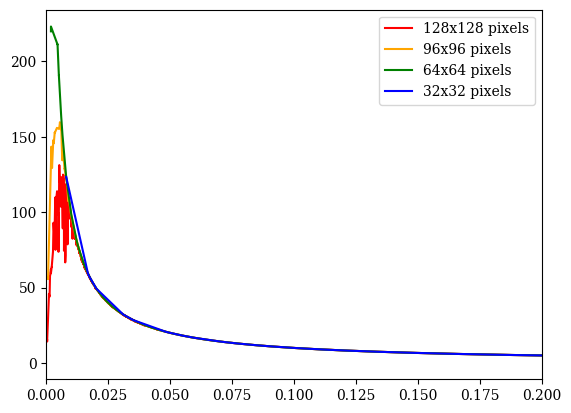

In [43]:
epochs=10
noise_level = 0.0
model = 'svd'
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed, results_folder)[3].t(), color='red', label=f'128x128 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed, results_folder)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed, results_folder)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed, results_folder)[3].t(), color='b', label=f'32x32 pixels')
plt.xlim(0,0.2)
plt.legend()

plt.show()

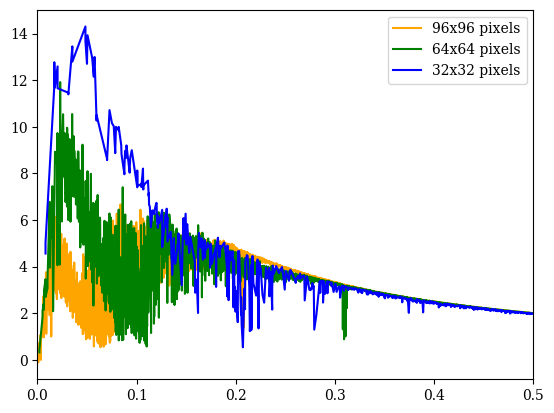

In [44]:
epochs=10
noise_level = 0.005
model = 'svd'
# plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed, results_folder)[3].t(), color='red', label=f'128x128 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed, results_folder)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed, results_folder)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed, results_folder)[3].t(), color='b', label=f'32x32 pixels')
plt.xlim(0,0.5)
plt.legend()

plt.show()

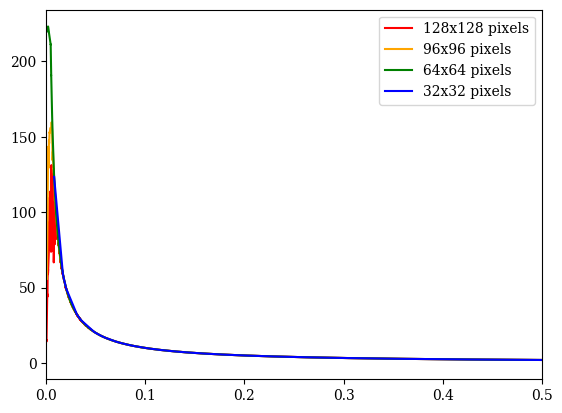

In [45]:
epochs=10
noise_level = 0.0
model = 'svd'
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed, results_folder)[3].t(), color='red', label=f'128x128 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed, results_folder)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed, results_folder)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed, results_folder)[3].t(), color='b', label=f'32x32 pixels')
plt.xlim(0,0.5)
plt.legend()

plt.show()

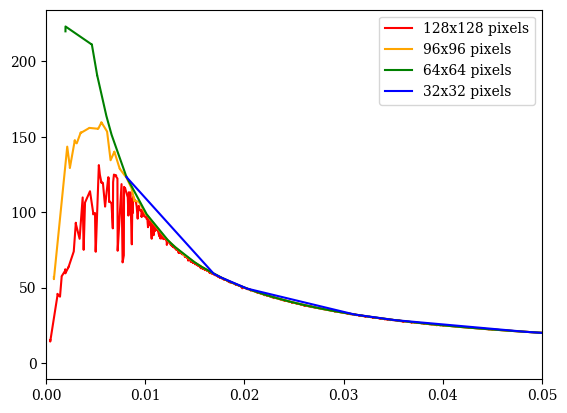

In [46]:
epochs=10
noise_level = 0.0
model = 'svd'
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed, results_folder)[3].t(), color='red', label=f'128x128 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed, results_folder)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed, results_folder)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed, results_folder)[3].t(), color='b', label=f'32x32 pixels')
plt.xlim(0,0.05)
plt.legend()

plt.show()

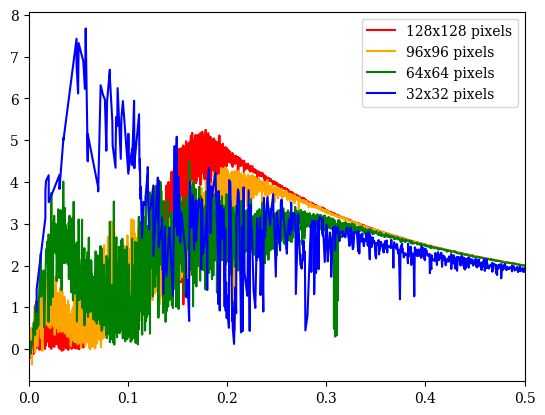

In [47]:
epochs=10
noise_level = 0.01
model = 'svd'
plt.plot(load_singular_values(128), load_variables(epochs, 128, noise_level, model, seed, results_folder)[3].t(), color='red', label=f'128x128 pixels')
plt.plot(load_singular_values(96), load_variables(epochs, 96, noise_level, model, seed, results_folder)[3].t(), color='orange', label=f'96x96 pixels')
plt.plot(load_singular_values(64), load_variables(epochs, 64, noise_level, model, seed, results_folder)[3].t(), color='green', label=f'64x64 pixels')
plt.plot(load_singular_values(32), load_variables(epochs, 32, noise_level, model, seed, results_folder)[3].t(), color='b', label=f'32x32 pixels')
plt.xlim(0,0.5)
plt.legend()

plt.show()

In [48]:
"""
Compute analytic solution
"""

singular_values_128 = load_singular_values(128)
singular_values_96  = load_singular_values(96)
singular_values_64  = load_singular_values(64)
singular_values_32  = load_singular_values(32)

# compute analytic
def compute_analytic(loaded_variables, singular_values):
    loaded_pi    = loaded_variables[0]
    loaded_gamma = loaded_variables[1]
    loaded_delta = loaded_variables[2]

    # filter_params = (self.singular_values*self.pi-self.gamma)/(self.singular_values**2*self.pi+self.delta+2*self.singular_values*self.gamma)
    return (singular_values*loaded_pi-loaded_gamma)/(singular_values**2*loaded_pi+loaded_delta+2*singular_values*loaded_gamma)


In [49]:
img_size

32

In [50]:
print(eval(f'singular_values_{img_size}'))

tensor([2.7790, 1.8005, 1.8002,  ..., 0.0169, 0.0081, 0.0081])


In [51]:
singular_values_32

tensor([2.7790, 1.8005, 1.8002,  ..., 0.0169, 0.0081, 0.0081])

In [52]:
epochs         = 10
img_size       = 32 # 32 64 96 128 
noise_level    = 5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
model          = 'svd'
results_folder = './28nov_volta'
this_analytic = compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}'))

In [53]:
load_singular_values(img_size)

tensor([2.7790, 1.8005, 1.8002,  ..., 0.0169, 0.0081, 0.0081])

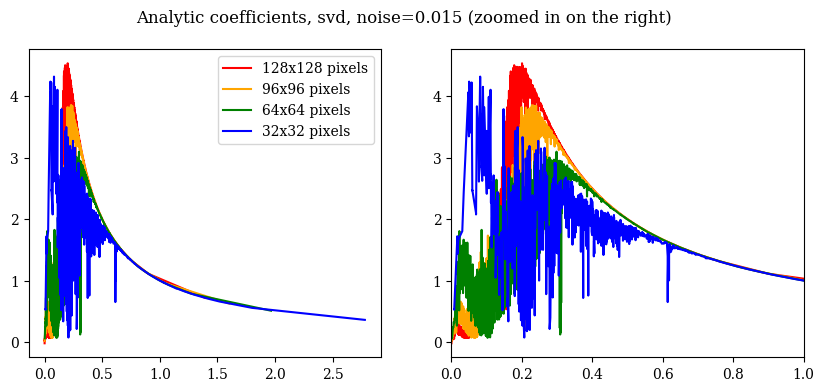

In [54]:
epochs         = 10
# img_size       = 32 # 32 64 96 128 
noise_level    = 15e-3 #0.0 5e-3 10e-3 15e-3 5e-1
model          = 'svd'
results_folder = './28nov_volta'

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
fig.suptitle(f"Analytic coefficients, svd, noise={noise_level} (zoomed in on the right)")

img_size = 128
ax1.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', label=f'{img_size}x{img_size} pixels')
ax2.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', label=f'{img_size}x{img_size} pixels')
# ax1.plot(torch.flip(load_singular_values(img_size), dims=(0,)), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', label=f'{img_size}x{img_size} pixels')
# ax2.plot(torch.flip(load_singular_values(img_size), dims=(0,)), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', label=f'{img_size}x{img_size} pixels')
img_size = 96
ax1.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', label=f'{img_size}x{img_size} pixels')
ax2.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', label=f'{img_size}x{img_size} pixels')
# ax1.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', label=f'{img_size}x{img_size} pixels')
# ax2.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', label=f'{img_size}x{img_size} pixels')
img_size = 64
ax1.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', label=f'{img_size}x{img_size} pixels')
ax2.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', label=f'{img_size}x{img_size} pixels')
# ax1.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', label=f'{img_size}x{img_size} pixels')
# ax2.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', label=f'{img_size}x{img_size} pixels')
img_size = 32
ax1.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', label=f'{img_size}x{img_size} pixels')
ax2.plot(load_singular_values(img_size),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', label=f'{img_size}x{img_size} pixels')
# ax1.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', label=f'{img_size}x{img_size} pixels')
# ax2.plot(torch.flip(load_singular_values(img_size), dims=(0,)),  compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', label=f'{img_size}x{img_size} pixels')

ax2.set_xlim([0, 1.0])
ax1.legend()
plt.show()

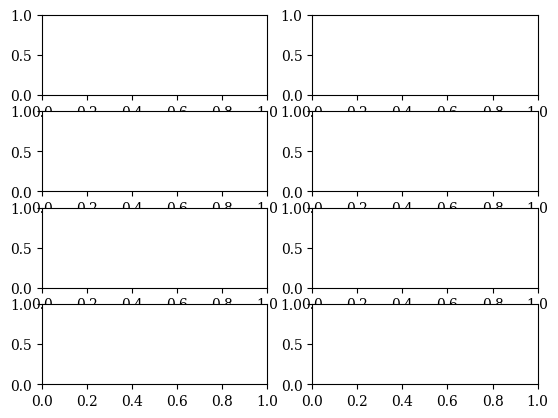

In [55]:
fig, axs = plt.subplots(4, 2)

In [56]:
axs[0,0]

<AxesSubplot:>

0.05
0.5
1.0
1.0


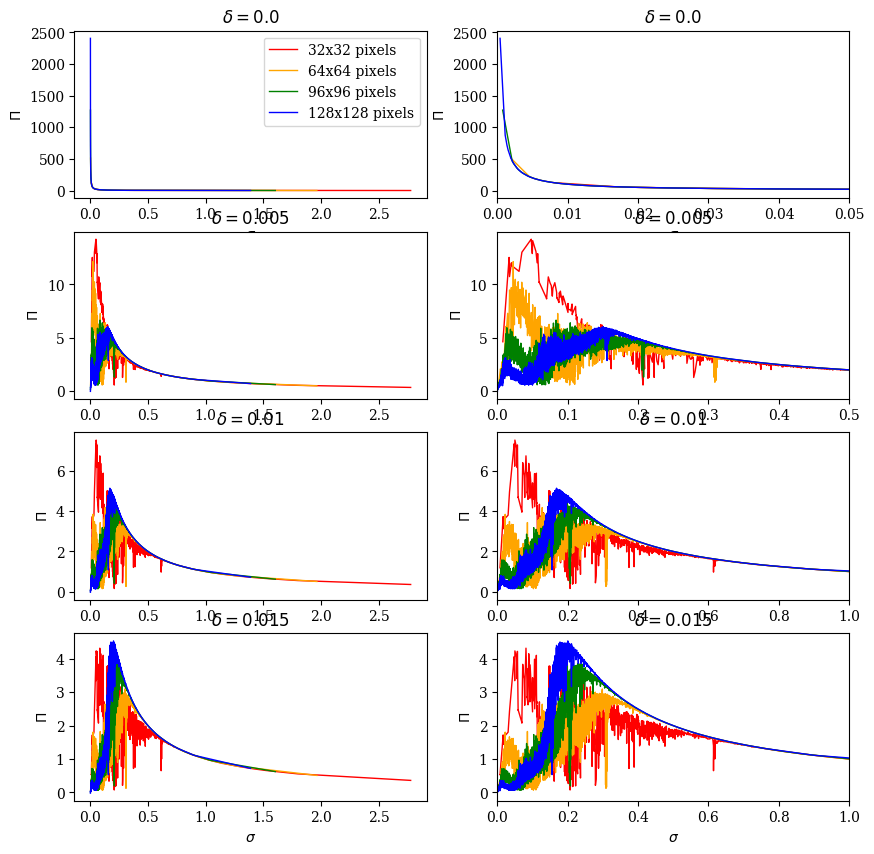

In [57]:
epochs         = 10
# img_size       = 32 # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x = [0.05, 0.5, 1.0, 1.0]
model          = 'svd'
results_folder = './28nov_volta'

fig, axs = plt.subplots(4, 2)
# fig.suptitle(f"Analytic coefficients, SVD, (zoomed in on the right)")
for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    fig.set_size_inches(10, 10)
    img_size = 32 #128
    axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', linewidth=1, label=f'{img_size}x{img_size} pixels')
    axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', linewidth=1, label=f'{img_size}x{img_size} pixels')
    img_size = 64 #96
    axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', linewidth=1, label=f'{img_size}x{img_size} pixels')
    axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', linewidth=1, label=f'{img_size}x{img_size} pixels')
    img_size = 96 #64
    axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', linewidth=1, label=f'{img_size}x{img_size} pixels')
    axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', linewidth=1, label=f'{img_size}x{img_size} pixels')
    img_size = 128 #32
    axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', linewidth=1, label=f'{img_size}x{img_size} pixels')
    axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', linewidth=1, label=f'{img_size}x{img_size} pixels')
    
    print(zoom_x)
    #axs[cont,0].set_ylabel(f'noise = {noise_level}')
    axs[cont,0].set_title(fr'$\delta = {noise_level}$')
    axs[cont,1].set_title(fr'$\delta = {noise_level}$')

    axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_xlabel(r'$\sigma$')
    axs[cont,1].set_xlabel(r'$\sigma$')
    axs[cont,0].set_ylabel(r'$\Pi$')
    axs[cont,1].set_ylabel(r'$\Pi$')
    
    
axs[0,0].legend()
if SAVE_FIG:
    plt.savefig('./Results/pic006-Analytic-coefficients.pdf')
plt.show()

In [58]:
# Same as before, but single (individual) plots

axs[0,0].set_title("Analytic coefficients")


Text(0.5, 1.0, 'Analytic coefficients')

In [59]:
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
for noise in v_noise_level:
    print(str(noise).replace('.', '-'))
    print(f"noise-{str(noise).replace('.', '-')}")

0-0
noise-0-0
0-005
noise-0-005
0-01
noise-0-01
0-015
noise-0-015


In [60]:
filename_base = 'pic006-Analytic-coefficients'
file_dir = lambda x : f'./Results/{x}.pdf'

# [... code here ...]
filename = filename_base + f"--noise-{str(noise).replace('.', '-')}"
file_dir(filename)

# plt.savefig(file_dir(filename))


'./Results/pic006-Analytic-coefficients--noise-0-015.pdf'

In [61]:
# plt.savefig('./Results/pic006-Analytic-coefficients.pdf')

aus_str = ''

In [62]:
print(f'\n{aus_str}')

In [63]:
N_ROW = 2
N_COL = 3
cont_row=0
cont_col=1

# INIT
aus_str +=  '\\begin{figure}'  
aus_str +=  '\n    \\centering'  


# FOR EACH PLOT

aus_str +=  '\n    \\subfloat\{\\includegraphics[scale = 0.35]{SVD_filters/'
aus_str += f'{filename}.pdf'
aus_str += '}}'

#\[scale = 0.35\]\{SVD_filters\/{filename}.pdf\}\}'
if cont_col+1==N_COL and cont_row+1!=N_ROW:
    aus_str += '\\\\'

    
# AT THE END
aus_str += '\n    \\caption{\\DR{insert caption here}}'
aus_str += '\n    \\label{fig:'
aus_str += f'{filename_base}'
aus_str += '}'
aus_str += '\n\\end{figure}'

In [64]:
print(aus_str)

\begin{figure}
    \centering
    \subfloat\{\includegraphics[scale = 0.35]{SVD_filters/pic006-Analytic-coefficients--noise-0-015.pdf}}
    \caption{\DR{insert caption here}}
    \label{fig:pic006-Analytic-coefficients}
\end{figure}


In [65]:
class print_LaTeX_code():
    def __init__(self, N_ROW, N_COL):
        self.aus_str = ''
        self.N_ROW, self.N_COL = N_ROW, N_COL
        
        self.aus_str = ''
        self.aus_str +=  '\\begin{figure}'  
        self.aus_str +=  '\n    \\centering' 
        
    def add_middle_lines(self, filename,cont_row,cont_col):
        # FOR EACH PLOT
        self.aus_str +=  '\n    \\subfloat{\\includegraphics[width=0.33\linewidth]{figures/SVD_filters/'
        self.aus_str += f'{filename}.pdf'
        self.aus_str += '}}'

        if cont_col+1==self.N_COL and cont_row+1!=self.N_ROW:
            self.aus_str += '\\\\'

    def add_ending_lines_and_print(self, filename_base):
        # AT THE END
        self.aus_str += '\n    \\caption{\\DR{insert caption here}}'
        self.aus_str += '\n    \\label{fig:'
        self.aus_str += f'{filename_base}'
        self.aus_str += '}'
        self.aus_str += '\n\\end{figure}'
        print(self.aus_str)

In [66]:
my_string = print_LaTeX_code(3, 2)

In [67]:
print(my_string.aus_str)

\begin{figure}
    \centering


0.05
0.5
1.0
1.0
\begin{figure}
    \centering
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-0.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-0--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-005.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-005--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-01.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-01--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic-coefficients--noise-0-015.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic006-Analytic

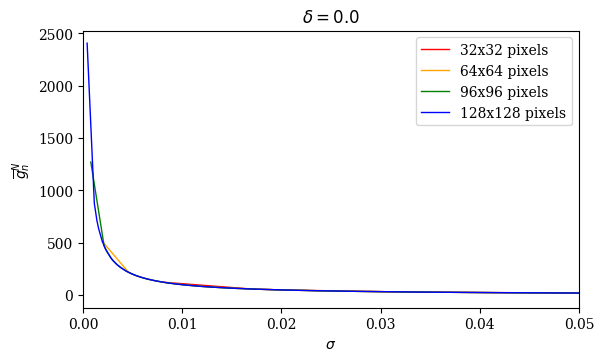

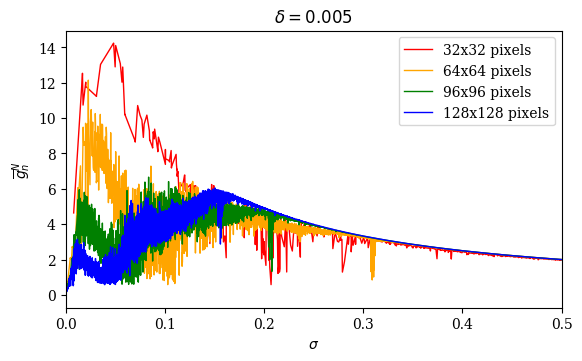

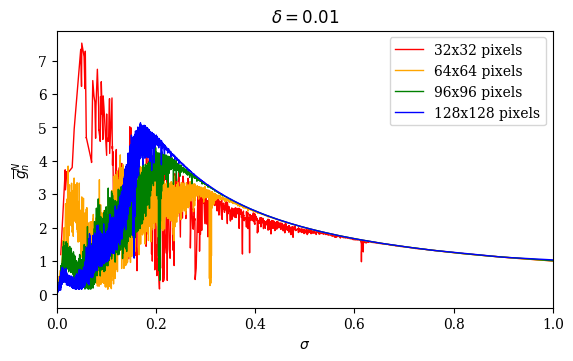

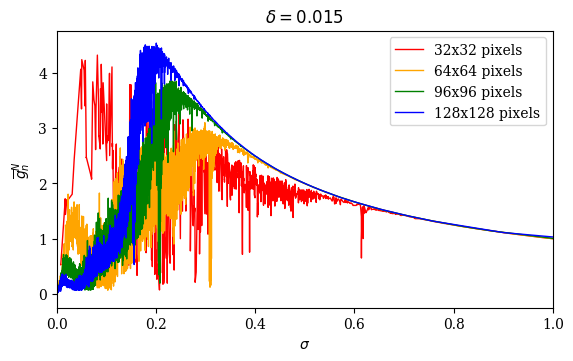

In [68]:
epochs         = 10
# img_size       = 32 # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x = [0.05, 0.5, 1.0, 1.0]
model          = 'svd'
results_folder = './28nov_volta'

my_string = print_LaTeX_code(4, 2)
filename_base = 'pic006-Analytic-coefficients'
file_dir = lambda x : f'./Results/{x}.pdf'


for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    fig, axs = plt.subplots()
    fig.set_size_inches(6.4, 3.6) #(6.4, 4.8)
    img_size = 32 #128
    axs.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='red', linewidth=1, label=f'{img_size}x{img_size} pixels')
    
    img_size = 64 #96
    axs.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='orange', linewidth=1, label=f'{img_size}x{img_size} pixels')
    
    img_size = 96 #64
    axs.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='green', linewidth=1, label=f'{img_size}x{img_size} pixels')
    
    img_size = 128 #32
    axs.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder), eval(f'singular_values_{img_size}')), color='b', linewidth=1, label=f'{img_size}x{img_size} pixels')
    
    
    print(zoom_x)
    axs.set_title(fr'$\delta = {noise_level}$')
    axs.legend()
    axs.set_xlabel(r'$\sigma$')
    axs.set_ylabel(r'$\overline{g}_n^N$')
    filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"
    my_string.add_middle_lines(filename,cont,0)
    if SAVE_FIG:
        plt.savefig(file_dir(filename))
    
    axs.set_xlim([0, zoom_x])    
    filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}--zoom"
    my_string.add_middle_lines(filename,cont,1)
    if SAVE_FIG:
        plt.savefig(file_dir(filename))
    
my_string.add_ending_lines_and_print(filename_base)    

# plt.show()

\begin{figure}
    \centering
    \subfloat{\includegraphics[scale = 0.35]{figures/fft_filters/analytic005.pdf}} 
    \subfloat{\includegraphics[scale = 0.35]{figures/fft_filters/learned005.pdf}}\\
    \subfloat{\includegraphics[scale = 0.35]{figures/fft_filters/analytic01.pdf}} 
    \subfloat{\includegraphics[scale = 0.35]{figures/fft_filters/learned01.pdf}}
    \caption{\DR{insert caption here}}
    \label{fig:FILENAME-NO-PDF}
\end{figure}


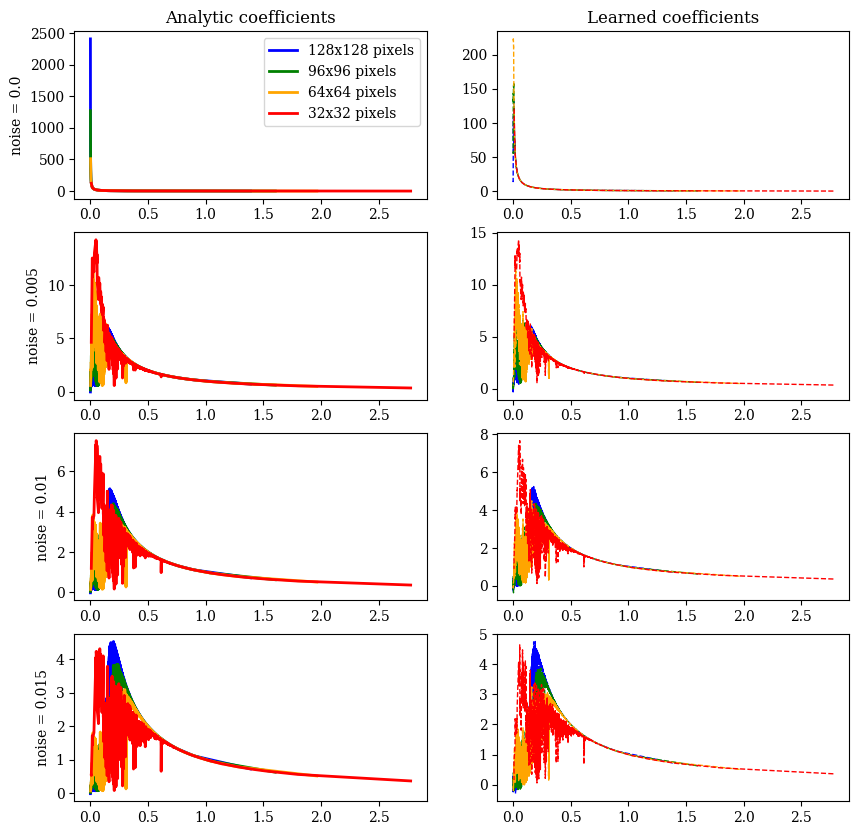

In [69]:
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(4, 2)
fig.set_size_inches(10, 10)
axs[0,0].set_title("Analytic coefficients")
axs[0,1].set_title("Learned coefficients")
# fig.suptitle(f"Analytic coefficients, svd, (zoomed in on the right)")
for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')), color=color, linewidth=2, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_singular_values(img_size),                  load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t()                                      , color=color, linewidth=1, linestyle='dashed', label=f'{img_size}x{img_size} pixels')
    
    #axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')
    
axs[0,0].legend()
if SAVE_FIG:
    plt.savefig('./Results/pic007-Analytic-vs-Learned-coefficients.pdf')
plt.show()

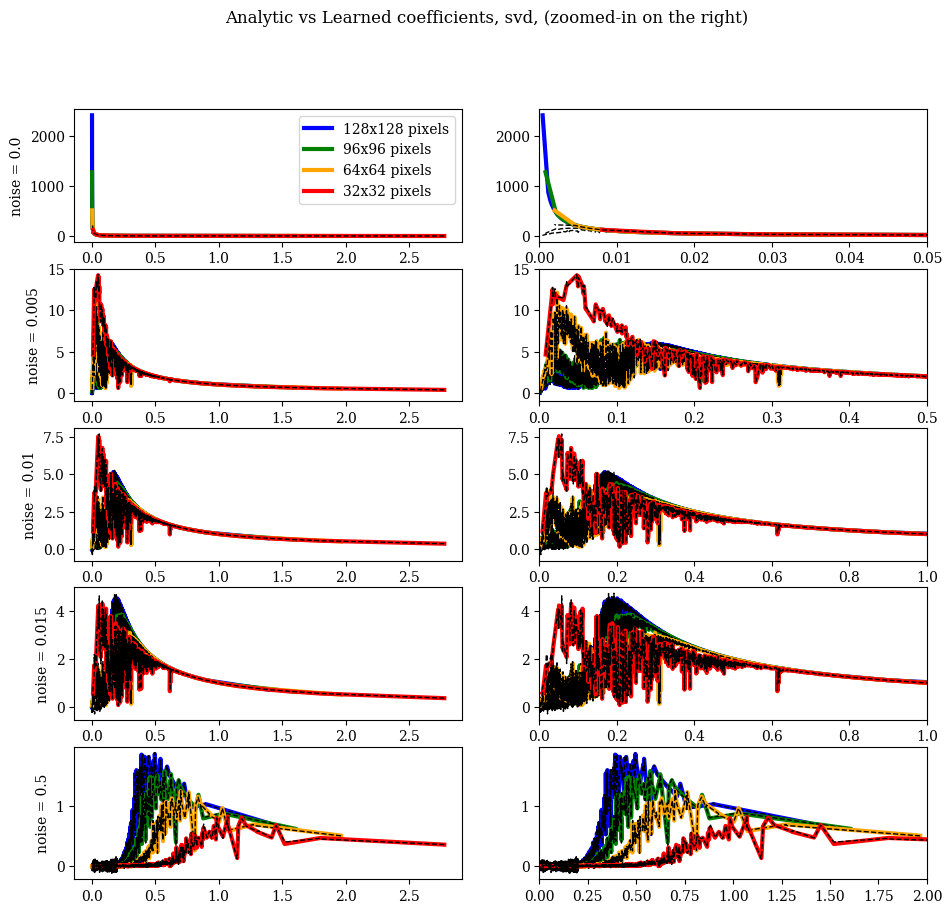

In [70]:
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(5, 2)
fig.set_size_inches(11, 10)
# axs[0,0].set_title("Analytic coefficients")
# axs[0,1].set_title("Learned coefficients")
fig.suptitle(f"Analytic vs Learned coefficients, svd, (zoomed-in on the right)")
for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')), color=color, linewidth=3, label=f'{img_size}x{img_size} pixels')
        axs[cont,0].plot(load_singular_values(img_size),                  load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t()                                      , color='black', linewidth=1, linestyle='dashed') #, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')), color=color, linewidth=3) #, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_singular_values(img_size),                  load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t()                                      , color='black', linewidth=1, linestyle='dashed') #, label=f'{img_size}x{img_size} pixels')
    
    axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')
    
axs[0,0].legend()
if SAVE_FIG:
    plt.savefig('./Results/pic008-Analytic-vs-Learned-coefficients.pdf')
plt.show()

\begin{figure}
    \centering
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-0.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-0--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-005.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-005--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-01.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-01--zoom.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic008-Analytic-vs-Learned-coefficients--noise-0-015.pdf}}
    \subfloat{\includegraphi

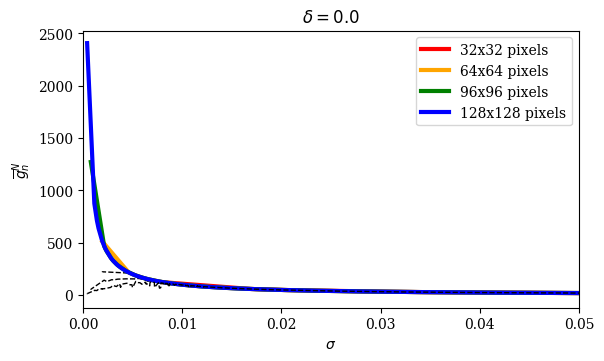

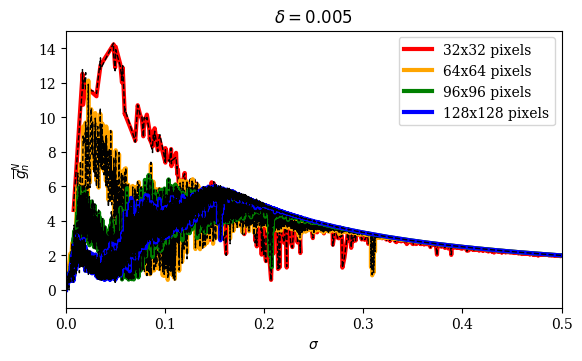

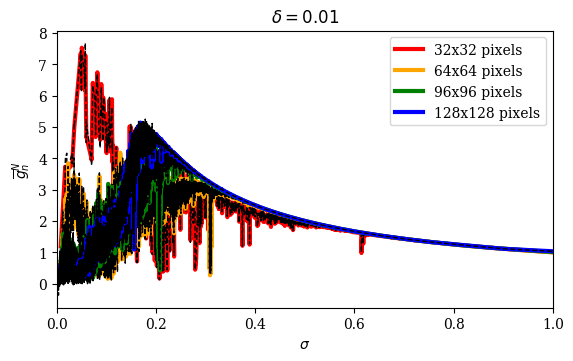

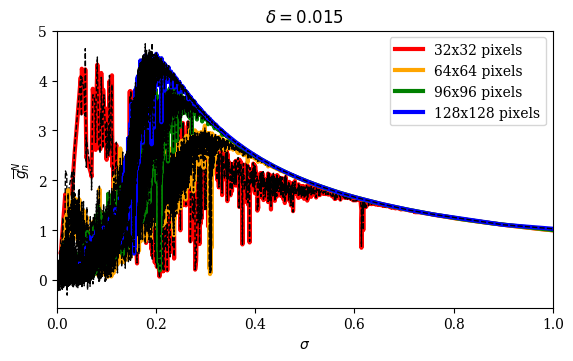

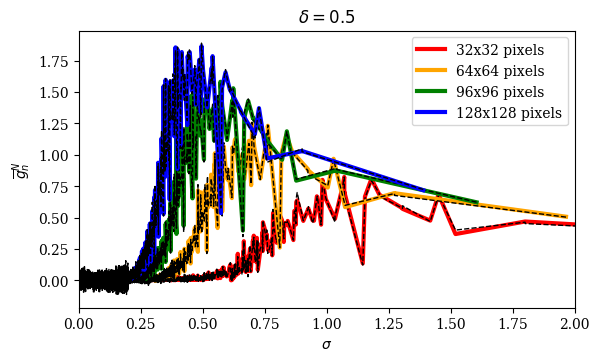

In [71]:
# As above, but individual plots

epochs         = 10
# img_size       = 32 # 32 64 96 128 
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x = [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

my_string = print_LaTeX_code(5, 2)
filename_base = 'pic008-Analytic-vs-Learned-coefficients'
file_dir = lambda x : f'./Results/{x}.pdf'

for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    fig, axs = plt.subplots()
    fig.set_size_inches(6.4, 3.6) #(6.4, 4.8)
    for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
        axs.plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')), color=color, linewidth=3, label=f'{img_size}x{img_size} pixels')
        axs.plot(load_singular_values(img_size),                  load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t()                                      , color='black', linewidth=1, linestyle='dashed') #, label=f'{img_size}x{img_size} pixels')
    
    axs.set_title(fr'$\delta = {noise_level}$')
    axs.legend()
    axs.set_xlabel(r'$\sigma$')
    axs.set_ylabel(r'$\overline{g}_n^N$')
    filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"
    my_string.add_middle_lines(filename,cont,0)
    if SAVE_FIG:
        plt.savefig(file_dir(filename))
    
    axs.set_xlim([0, zoom_x])    
    filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}--zoom"
    my_string.add_middle_lines(filename,cont,1)
    if SAVE_FIG:
        plt.savefig(file_dir(filename))
    
my_string.add_ending_lines_and_print(filename_base)    

# plt.show()

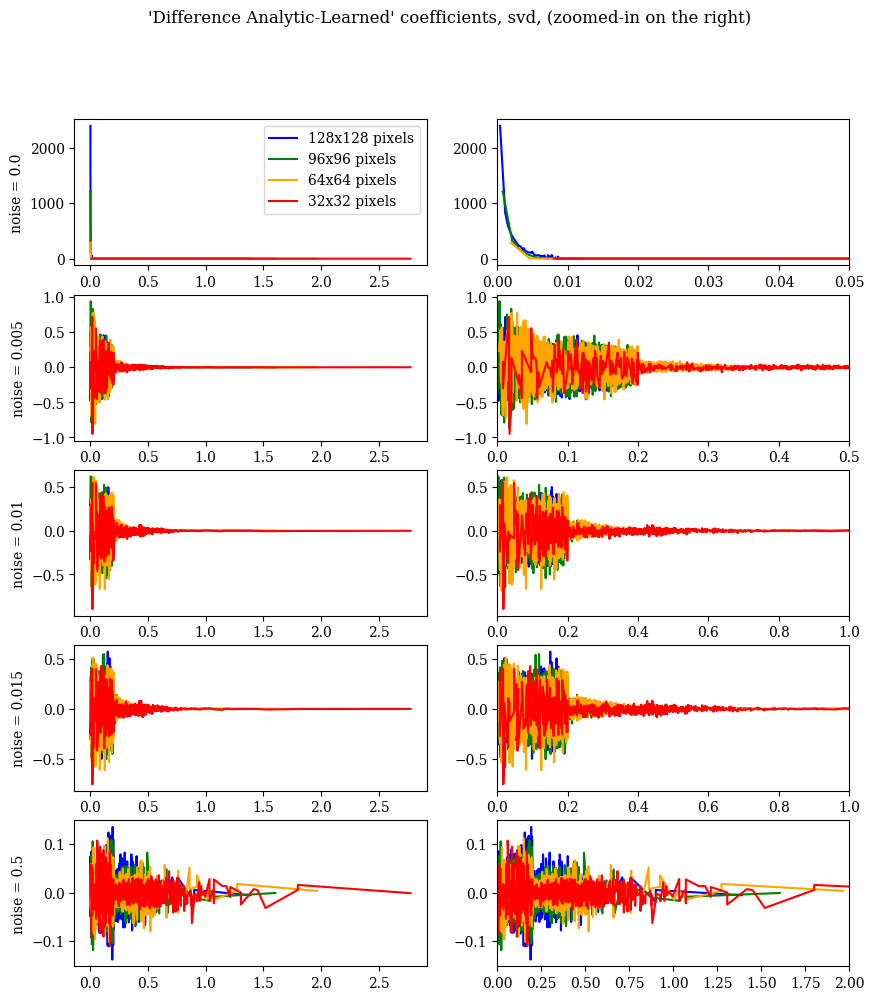

In [72]:
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(5, 2)
fig.set_size_inches(10, 11)
# axs[0,0].set_title("Analytic coefficients")
# axs[0,1].set_title("Learned coefficients")
fig.suptitle(f"'Difference Analytic-Learned' coefficients, svd, (zoomed-in on the right)")
for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        axs[cont,0].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')) - load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t(), color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')) - load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t(), color=color)
    
    axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')
    
axs[0,0].legend()
plt.show()

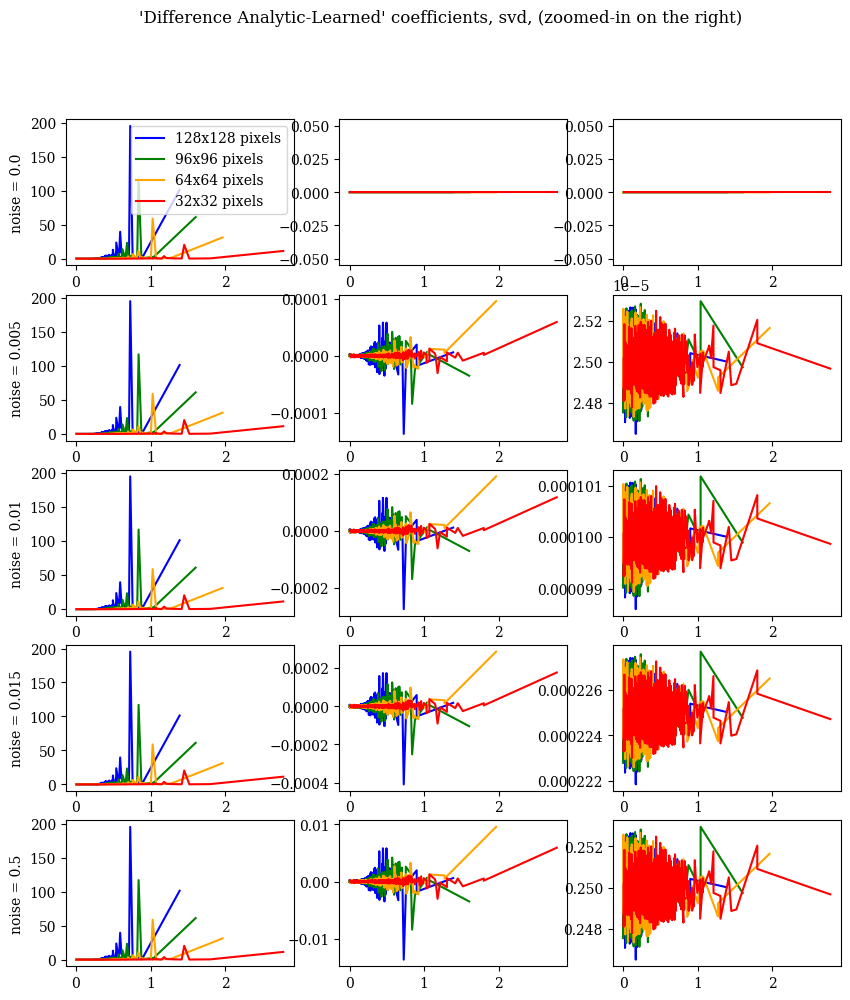

In [73]:
# Plot Pi, Gamma, Delta 
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(10, 11)
# axs[0,0].set_title("Analytic coefficients")
# axs[0,1].set_title("Learned coefficients")
fig.suptitle(f"'Difference Analytic-Learned' coefficients, svd, (zoomed-in on the right)")
for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        axs[cont,0].plot(load_singular_values(img_size), load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0], color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_singular_values(img_size), load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1], color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont,2].plot(load_singular_values(img_size), load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2], color=color, label=f'{img_size}x{img_size} pixels')
        #axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')) - load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t(), color=color)
    
    #axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')
    
axs[0,0].legend()
plt.show()

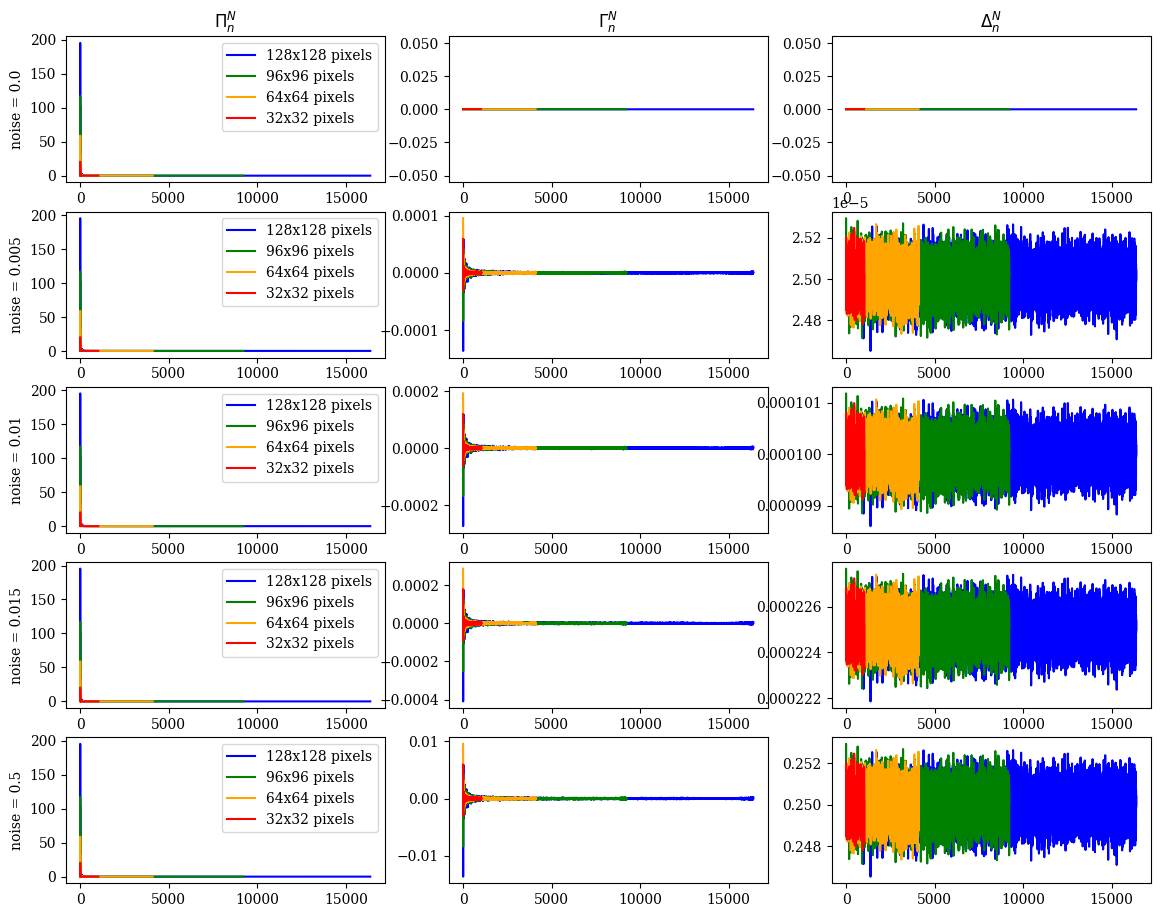

In [74]:
# Plot Pi, Gamma, Delta 
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(14, 11)
axs[0,0].set_title(r"$\Pi_n^N$")
axs[0,1].set_title(r"$\Gamma_n^N$")
axs[0,2].set_title(r"$\Delta_n^N$")
# fig.suptitle(f"'Difference Analytic-Learned' coefficients, svd, (zoomed-in on the right)")

###################################################################
## It doesn't work as expected. Speak with Alex about this
# axs[0,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[1,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[2,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[3,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[4,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
###################################################################

for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        axs[cont,0].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0], color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont,1].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1], color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont,2].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2], color=color, label=f'{img_size}x{img_size} pixels')
        #axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')) - load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t(), color=color)
        axs[cont,0].legend()

    #axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')
    
axs[0,0].legend()
if SAVE_FIG:
    plt.savefig('./Results/pic001-Pi-Gamma-Delta.pdf')
plt.show()

\begin{figure}
    \centering
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-0Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-0Gamma.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-0Delta.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-005Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-005Gamma.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-005Delta.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-01Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--noise-0-01Gamma.pdf}}
    \subfloat{\includegraphics[

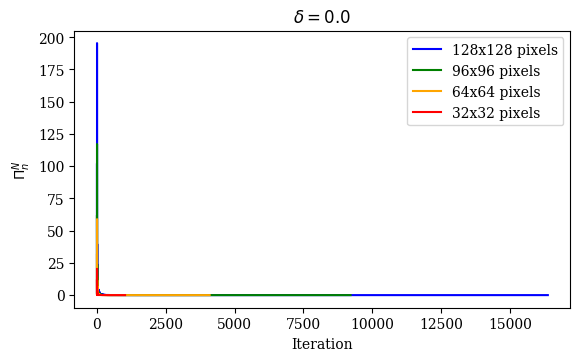

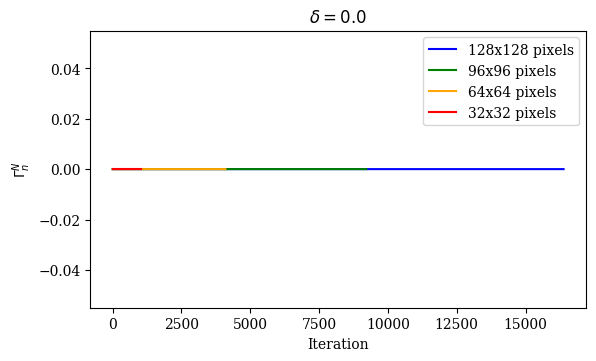

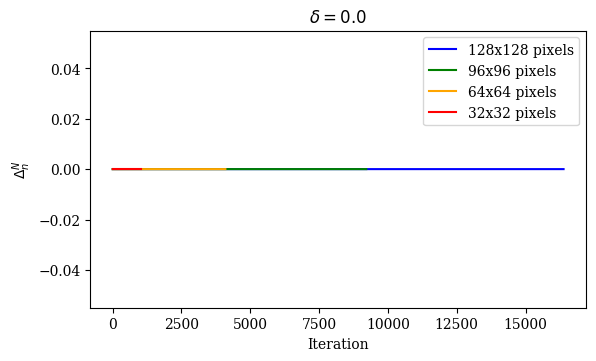

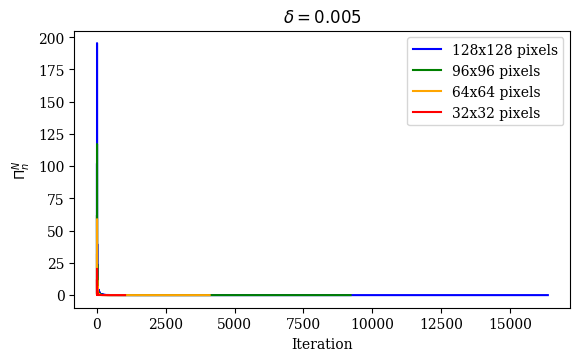

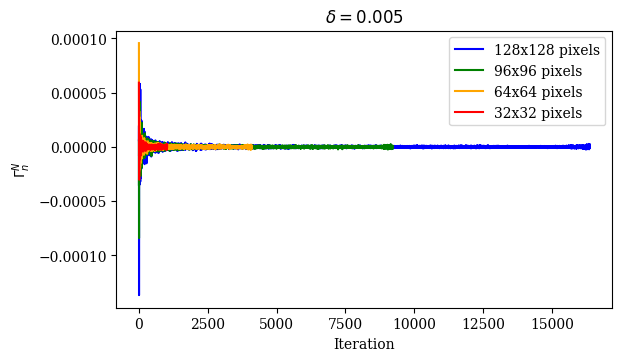

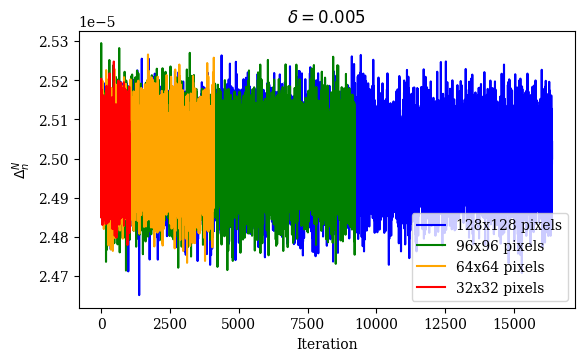

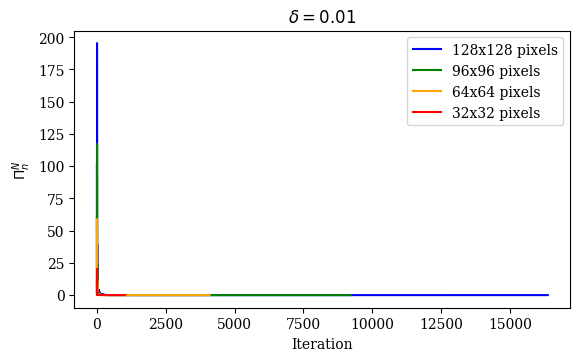

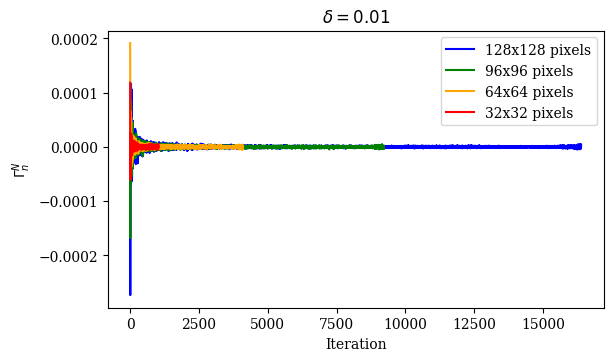

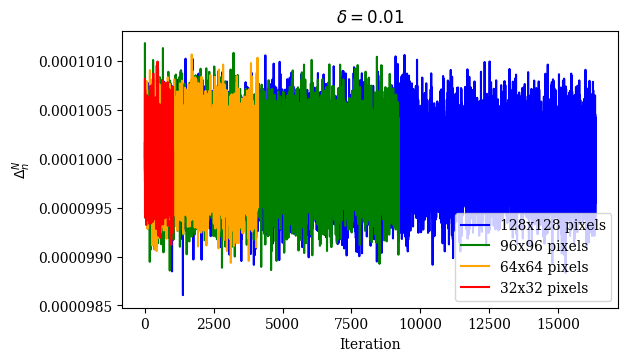

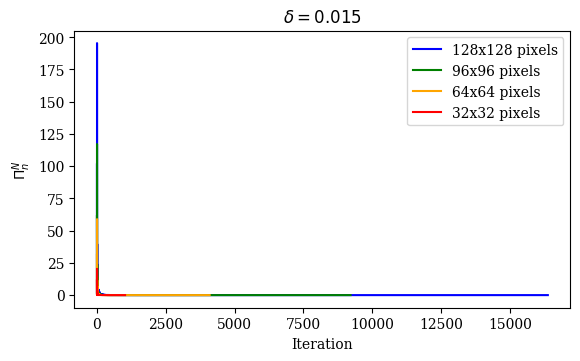

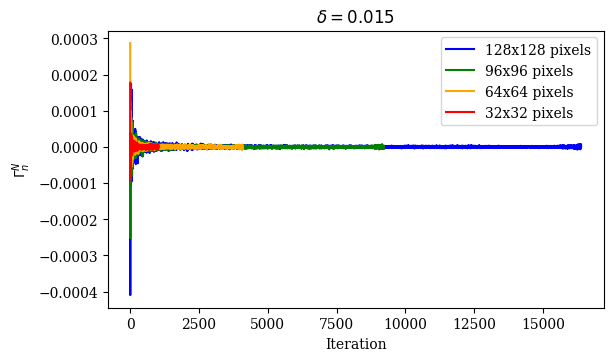

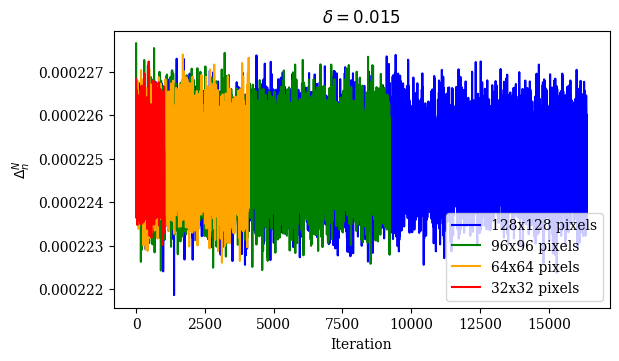

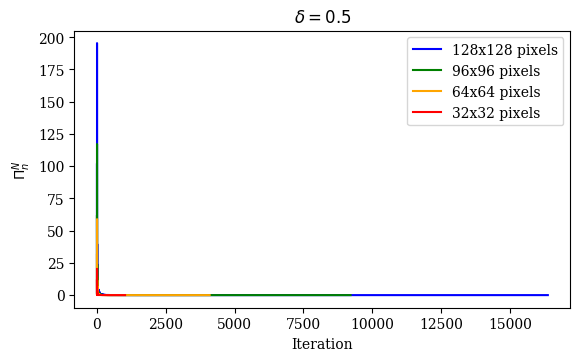

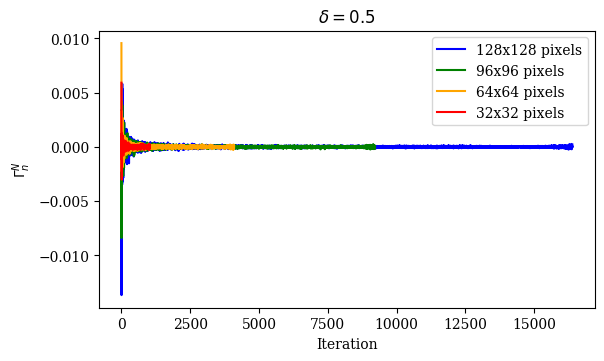

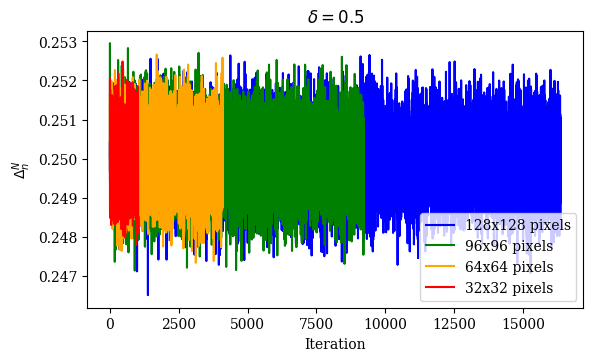

In [75]:
# Come sopra, ma singolo

epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

my_string = print_LaTeX_code(5, 3)
filename_base = 'pic001-Pi-Gamma-Delta'
file_dir = lambda x : f'./Results/{x}.pdf'

v_pi_gamma_delta = ['Pi', 'Gamma', 'Delta']

for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for cont_col, pi_gamma_delta in enumerate(v_pi_gamma_delta):
        fig, axs = plt.subplots()
        fig.set_size_inches(6.4, 3.6) #(6.4, 4.8)
        for (img_size, color) in zip(v_img_size, v_color):
            axs.plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col], color=color, label=f'{img_size}x{img_size} pixels')

        axs.set_title(fr'$\delta = {noise_level}$')
        axs.legend()
        #axs.set_xlabel(r'$\sigma$')
        axs.set_xlabel('Iteration')
        axs.set_ylabel(fr'$\{pi_gamma_delta}_n^N$')
        filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"
        filename += v_pi_gamma_delta[cont_col]
        my_string.add_middle_lines(filename,cont,cont_col)
        if SAVE_FIG:
            plt.savefig(file_dir(filename))

my_string.add_ending_lines_and_print(filename_base)    

# plt.show()

\begin{figure}
    \centering
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-0Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-0Gamma.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-0Delta.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-005Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-005Gamma.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-005Delta.pdf}}\\
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxis--noise-0-01Pi.pdf}}
    \subfloat{\includegraphics[width=0.33\linewidth]{figures/SVD_filters/pic001-Pi-Gamma-Delta--xaxi

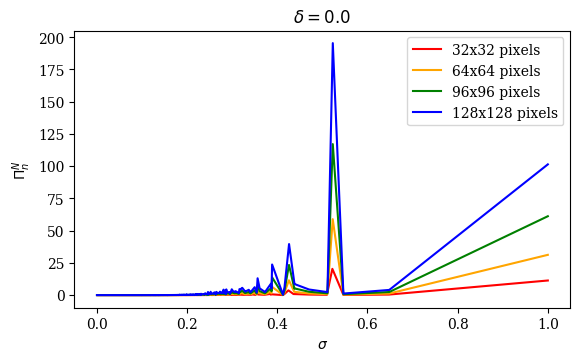

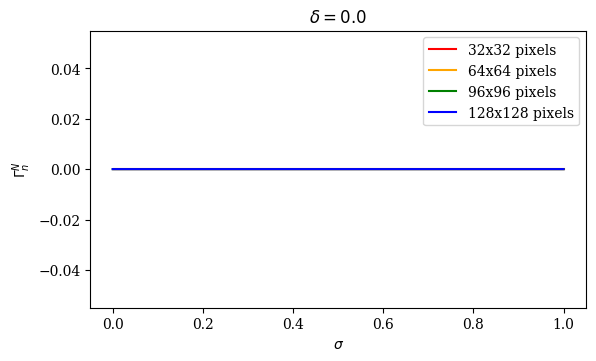

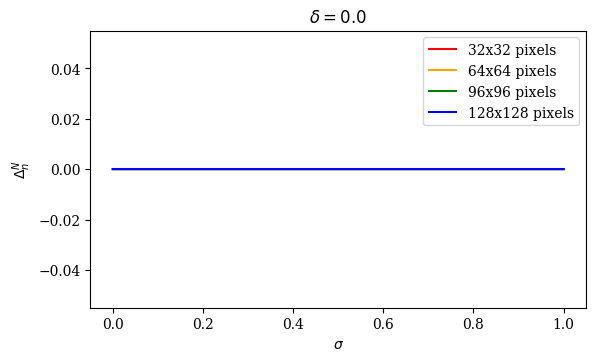

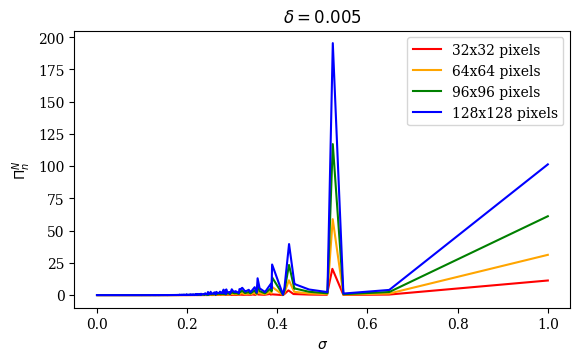

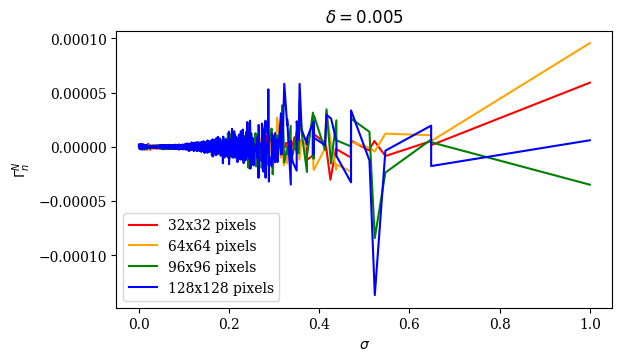

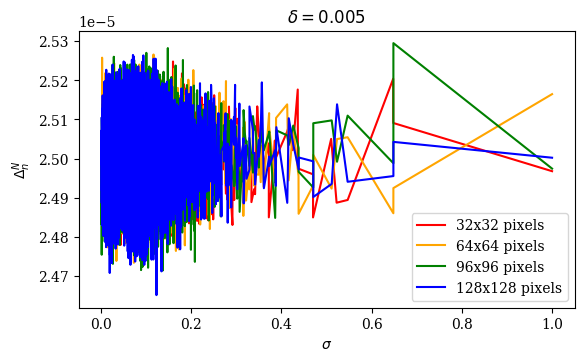

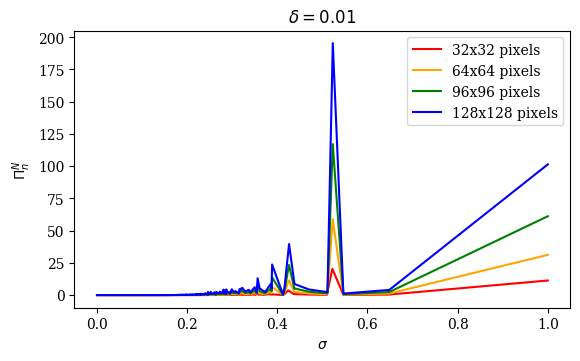

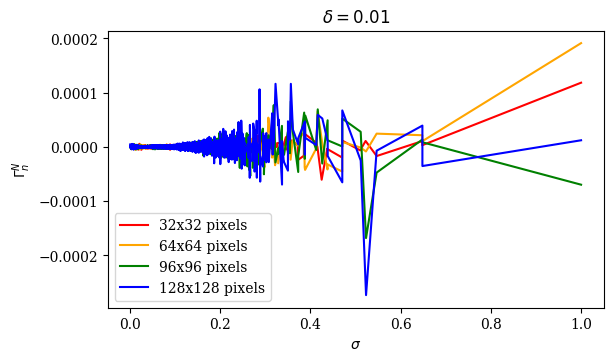

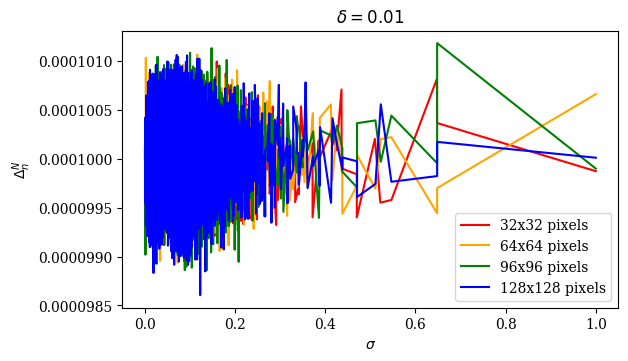

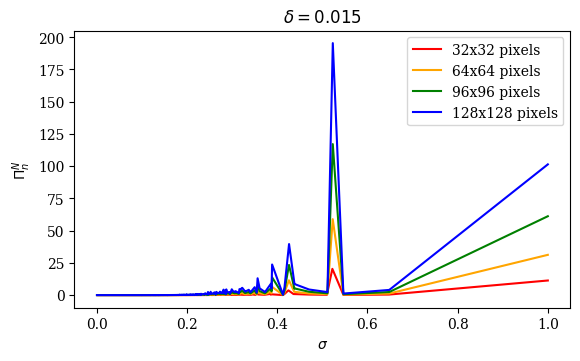

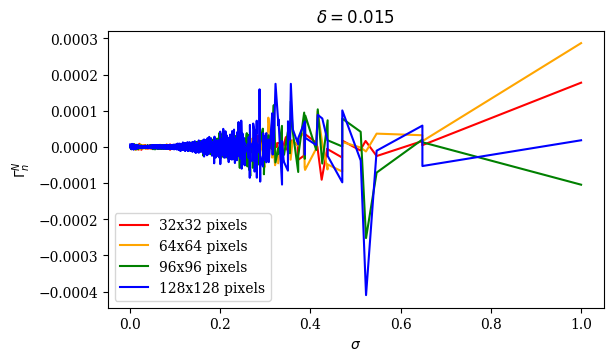

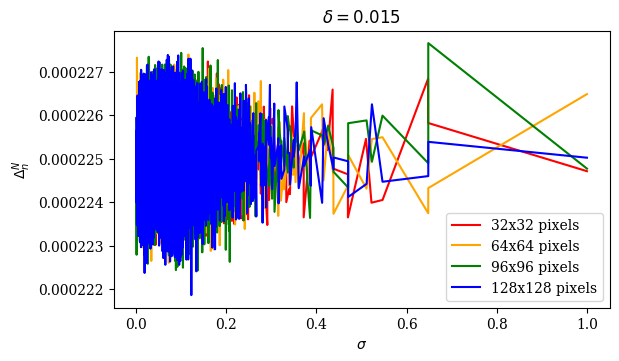

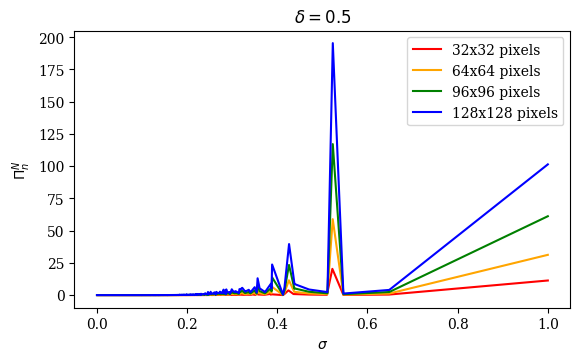

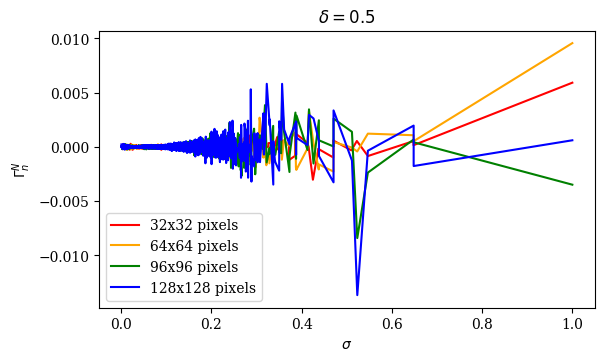

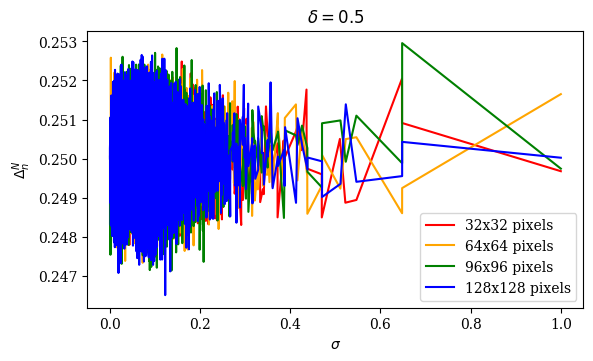

In [76]:
# Come sopra, ma singolo
# E 
# L'asse x è sui valori singolari

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
# Update 07 Dec 2022 

"""
Now I am "normalising" wrt 
the max value of \sigma (x axis) 
and 
the last value of \Pi (y axis)

Result: Pi overlaps for different resolutions (good)

--> What happens if we use the same "normalization" coefficients for \Gamma and \Delta?
"""

epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

my_string = print_LaTeX_code(5, 3)
filename_base = 'pic001-Pi-Gamma-Delta--xaxis'
file_dir = lambda x : f'./Results/{x}.pdf'

v_pi_gamma_delta = ['Pi', 'Gamma', 'Delta']
v_pi_last = []
v_pi_max  = []
v_sigma_max = []

for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for cont_col, pi_gamma_delta in enumerate(v_pi_gamma_delta):
        fig, axs = plt.subplots()
        fig.set_size_inches(6.4, 3.6) #(6.4, 4.8)
        for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
            #if cont_col!=0:
            #    axs.plot(load_singular_values(img_size), load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col], color=color, label=f'{img_size}x{img_size} pixels')
            #else:
            #    v_pi_last.append(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col][0])
            #    v_pi_max.append(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col].max())
            #    v_sigma_max.append(load_singular_values(img_size).max())
            #    axs.plot((1/v_sigma_max[-1])*load_singular_values(img_size), (1/v_pi_last[-1])*load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col], color=color, label=f'{img_size}x{img_size} pixels')
            if cont_col==0:
                v_pi_last.append(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col][0])
                v_pi_max.append(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col].max())
            v_sigma_max.append(load_singular_values(img_size).max())
            # (1/v_pi_last[-1])*
            axs.plot((1/v_sigma_max[-1])*load_singular_values(img_size), load_variables(epochs, img_size, noise_level, model, seed, results_folder)[cont_col], color=color, label=f'{img_size}x{img_size} pixels')
        axs.set_title(fr'$\delta = {noise_level}$')
        axs.legend()
        axs.set_xlabel(r'$\sigma$')
        #axs.set_xlabel('Iteration')
        axs.set_ylabel(fr'$\{pi_gamma_delta}_n^N$')
        filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"
        filename += v_pi_gamma_delta[cont_col]
        my_string.add_middle_lines(filename,cont,cont_col)
        if SAVE_FIG:
            plt.savefig(file_dir(filename))

my_string.add_ending_lines_and_print(filename_base)    

# plt.show()

In [77]:
img_size = 128
v_sigma_max.append(load_singular_values(img_size).max())
aus = compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0:3], (1/v_sigma_max[-1])*load_singular_values(img_size))

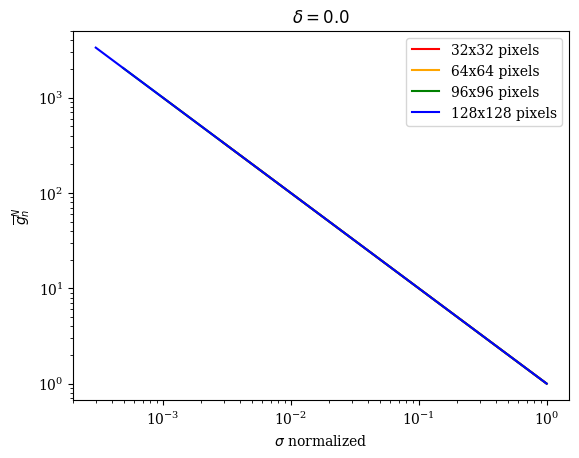

In [78]:
v_sigma_max = []
noise_level = 0.0


my_string = print_LaTeX_code(1, 1)
filename_base = 'normalized-coefficients--norm-pi'
file_dir = lambda x : f'./Results/{x}.pdf'
    
fig, axs = plt.subplots()    
for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
    v_sigma_max.append(load_singular_values(img_size).max())
    this_pi__y_squeezed = (load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0])/(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0][0])
    this_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
    this_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]
    this_pi_gamma_delta = [this_pi__y_squeezed, this_gamma, this_delta]

    aus = compute_analytic(this_pi_gamma_delta, (1/v_sigma_max[-1])*load_singular_values(img_size))
    axs.plot((1/v_sigma_max[-1])*load_singular_values(img_size), aus, color=color, label=f'{img_size}x{img_size} pixels')
#axs.set_xlim([0, 0.025])
axs.legend()

axs.set_title(fr'$\delta = {noise_level}$')
axs.set_xlabel(r'$\sigma$ normalized')
#axs.set_xlabel('Iteration')
axs.set_ylabel(r'$\overline{g}_n^N$')
filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"

plt.yscale('log')
plt.xscale('log')

#my_string.add_middle_lines(filename,cont,cont_col)
if SAVE_FIG:
    plt.savefig(file_dir(filename))



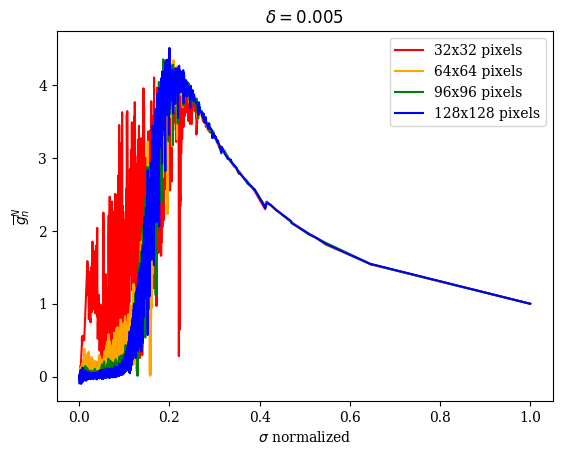

In [79]:
v_sigma_max = []
noise_level = 0.005

"""
This plot may be better if we do not plot the 32x32 resolution coefficients.
I think it's helpful to see it, but at the same time it's making the whole Figure a bit messy.

If you want to keep it, choose 
BOOLEAN_KEEP_32 = True 
"""
BOOLEAN_KEEP_32 = True # True

my_string = print_LaTeX_code(1, 1)
filename_base = 'normalized-coefficients--norm-pi'

fig, axs = plt.subplots()    
for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
    if BOOLEAN_KEEP_32 or img_size != 32:

        v_sigma_max.append(load_singular_values(img_size).max())
        this_pi__y_squeezed = (load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0])/(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0][0])
        this_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
        this_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]
        this_pi_gamma_delta = [this_pi__y_squeezed, this_gamma, this_delta]

        g = compute_analytic(this_pi_gamma_delta, (1/v_sigma_max[-1])*load_singular_values(img_size))
        axs.plot((1/v_sigma_max[-1])*load_singular_values(img_size), g, color=color, label=f'{img_size}x{img_size} pixels')# this_pi__y_squeezed)
#axs.set_xlim([0, 0.025])
axs.legend()

"""
Here same values are really close to y=0, so I wouldn't recommend to use
plt.yscale('log')
"""
# plt.yscale('log')
# plt.xscale('log')

axs.set_title(fr'$\delta = {noise_level}$')
axs.set_xlabel(r'$\sigma$ normalized')
#axs.set_xlabel('Iteration')
axs.set_ylabel(r'$\overline{g}_n^N$')
filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"

if SAVE_FIG:
    plt.savefig(file_dir(filename))


In [80]:
# Same plots as the two above, but now we scale 
# Delta by Delta(sigma_max) 
# and 
# Gamma by Gamma(sigma_max)
# (Previously we were just scaling Pi)

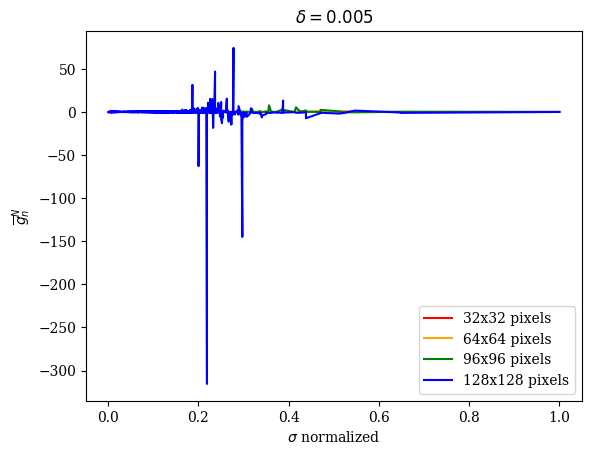

In [81]:
"""
Results: Normalizing...
1) "Pi and Delta"           vs "Pi" --> similar result
2) "Pi and Gamma"           vs "Pi" --> different result ("Pi and Gamma" looks not so good)
3) "Pi and Gamma and Delta" vs "Pi" --> different result (again, it doesn't look  good)
"""

NORMALIZE_GAMMA = True
NORMALIZE_DELTA = True


v_sigma_max = []
noise_level = 0.005 # for noise_level = 0.0 Gamma and Delta are 0, so it doesn't make sense to divide them by 0



my_string = print_LaTeX_code(1, 1)
filename_base = 'normalized-coefficients--norm-pi-gamma-delta'
file_dir = lambda x : f'./Results/{x}.pdf'
    
fig, axs = plt.subplots()    
for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
    v_sigma_max.append(load_singular_values(img_size).max())
    this_pi__y_squeezed = (load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0])/(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0][0])
    this_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
    this_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]

    if NORMALIZE_GAMMA:
        this_gamma /= load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1][0]
    if NORMALIZE_DELTA:
        this_delta /= load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2][0]
    
    this_pi_gamma_delta = [this_pi__y_squeezed, this_gamma, this_delta]

    aus = compute_analytic(this_pi_gamma_delta, (1/v_sigma_max[-1])*load_singular_values(img_size))
    axs.plot((1/v_sigma_max[-1])*load_singular_values(img_size), aus, color=color, label=f'{img_size}x{img_size} pixels')
#axs.set_xlim([0, 0.025])
axs.legend()

axs.set_title(fr'$\delta = {noise_level}$')
axs.set_xlabel(r'$\sigma$ normalized')
#axs.set_xlabel('Iteration')
axs.set_ylabel(r'$\overline{g}_n^N$')
filename = filename_base + f"--noise-{str(noise_level).replace('.', '-')}"

# plt.yscale('log')
# plt.xscale('log')

#my_string.add_middle_lines(filename,cont,cont_col)
if SAVE_FIG:
    plt.savefig(file_dir(filename))



tensor(6.0998e-06)


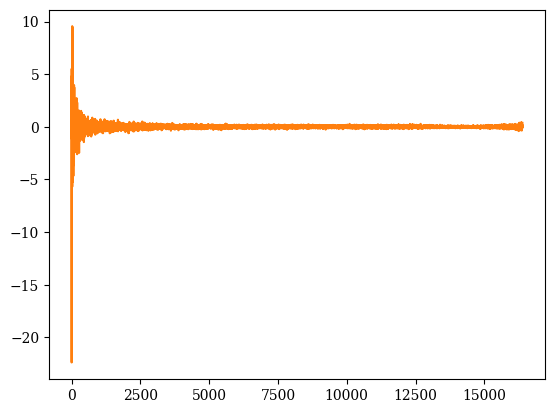

In [82]:
# How does the normalization of Gamma affect Gamma?

noise_level = 0.005
this_gamma = (load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1])#/(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1][0])

print(this_gamma[0])
plt.plot(this_gamma)
plt.plot(this_gamma/this_gamma[0])


tensor(2.5002e-05)


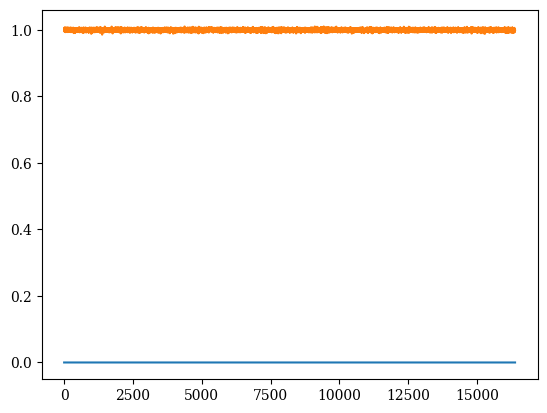

In [83]:
# How does the normalization of Delta affect Delta?

this_delta = (load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2])#/(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1][0])

print(this_delta[0])
plt.plot(this_delta)
plt.plot(this_delta/this_delta[0])

In [84]:
for (img_size, color) in zip(v_img_size[::-1], v_color[::-1]):
    print(load_singular_values(img_size).min())
    print(load_singular_values(img_size).max())
    print(load_singular_values(img_size).min() / load_singular_values(img_size).max())
    
    print()


tensor(0.0081)
tensor(2.7790)
tensor(0.0029)

tensor(0.0020)
tensor(1.9652)
tensor(0.0010)

tensor(0.0008)
tensor(1.6046)
tensor(0.0005)

tensor(0.0004)
tensor(1.3897)
tensor(0.0003)



In [85]:
print(v_pi_last[0:4])
print(v_pi_max[0:4])
print(v_sigma_max[0:4])

[tensor(11.3356), tensor(31.2377), tensor(61.1726), tensor(101.3807)]
[tensor(20.3842), tensor(58.9097), tensor(117.1120), tensor(195.4005)]
[tensor(2.7790), tensor(1.9652), tensor(1.6046), tensor(1.3897)]


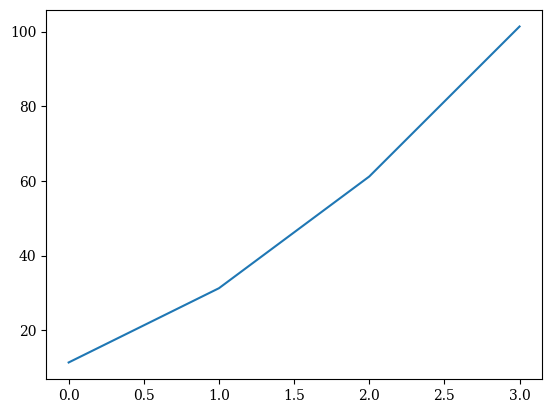

In [86]:
plt.plot(v_pi_last[0:4])
#plt.yscale('log')

In [87]:
load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0][-1]

tensor(0.0048)

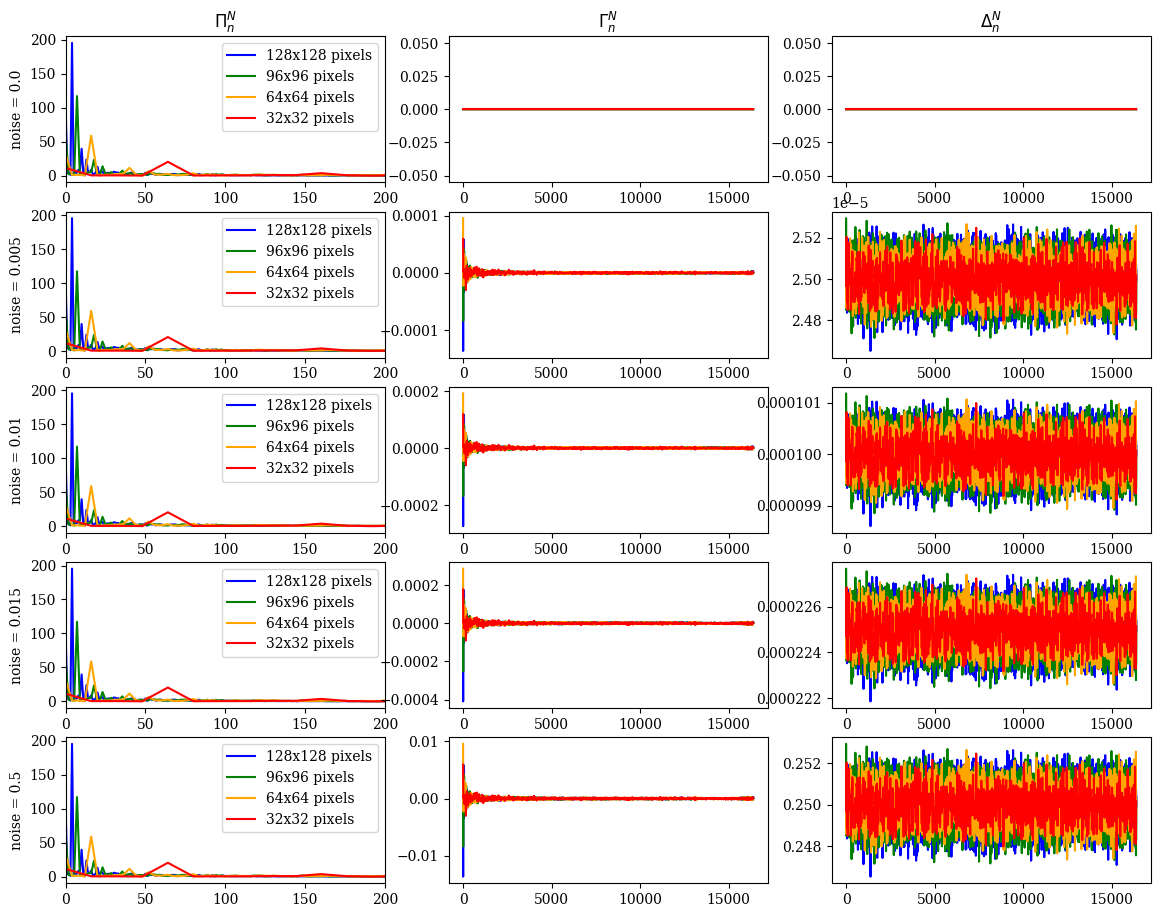

In [88]:
BOOLEAN_CHECK = True

# for (img_size, color) in zip(v_img_size, v_color):
#     loaded_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
#     if BOOLEAN_CHECK:
#         max_x = len(loaded_gamma)
#         BOOLEAN_CHECK = False
#     ax[0].plot(torch.linspace(0, max_x, len(loaded_gamma)), loaded_gamma, color=color, label=f'{img_size}x{img_size} pixels')


# Plot Pi, Gamma, Delta -- stretched
epochs         = 10
v_img_size     = [128, 96, 64, 32] # 32 64 96 128 
v_noise_level  = [0.0, 5e-3, 10e-3, 15e-3, 5e-1] #5e-1 #0.0 5e-3 10e-3 15e-3 5e-1
v_zoom_x =       [0.05, 0.5, 1.0, 1.0, 2.0]
model          = 'svd'
results_folder = './28nov_volta'
v_color = ['b', 'green', 'orange', 'red']

fig, axs = plt.subplots(5, 3)
fig.set_size_inches(14, 11)
axs[0,0].set_title(r"$\Pi_n^N$")
axs[0,1].set_title(r"$\Gamma_n^N$")
axs[0,2].set_title(r"$\Delta_n^N$")
# fig.suptitle(f"'Difference Analytic-Learned' coefficients, svd, (zoomed-in on the right)")

###################################################################
## It doesn't work as expected. Speak with Alex about this
# axs[0,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[1,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[2,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[3,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
# axs[4,2].yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: f"{x:.0e}"))
###################################################################

for cont, (noise_level, zoom_x) in enumerate(zip(v_noise_level, v_zoom_x)):
    for (img_size, color) in zip(v_img_size, v_color):
        
        loaded_pi, loaded_gamma, loaded_delta, _ = load_variables(epochs, img_size, noise_level, model, seed, results_folder)
        #loaded_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
        #loaded_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]
        if BOOLEAN_CHECK:
            max_x = len(loaded_gamma)
            BOOLEAN_CHECK = False
        axs[cont, 0].plot(torch.linspace(0, max_x, len(loaded_pi)), loaded_pi, color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont, 1].plot(torch.linspace(0, max_x, len(loaded_gamma)), loaded_gamma, color=color, label=f'{img_size}x{img_size} pixels')
        axs[cont, 2].plot(torch.linspace(0, max_x, len(loaded_delta)), loaded_delta, color=color, label=f'{img_size}x{img_size} pixels')

        #axs[cont,0].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[0], color=color, label=f'{img_size}x{img_size} pixels')
        #axs[cont,1].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1], color=color, label=f'{img_size}x{img_size} pixels')
        #axs[cont,2].plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2], color=color, label=f'{img_size}x{img_size} pixels')
        #axs[cont,1].plot(load_singular_values(img_size), compute_analytic(load_variables(epochs, img_size, noise_level, model, seed, results_folder),        eval(f'singular_values_{img_size}')) - load_variables(epochs, img_size, noise_level, model, seed, results_folder)[3].t(), color=color)
        axs[cont,0].legend()

    #axs[cont,1].set_xlim([0, zoom_x])
    axs[cont,0].set_ylabel(f'noise = {noise_level}')

axs[0,0].set_xlim([0,200])
axs[1,0].set_xlim([0,200])
axs[2,0].set_xlim([0,200])
axs[3,0].set_xlim([0,200])
axs[4,0].set_xlim([0,200])
axs[0,0].legend()
if SAVE_FIG:
    plt.savefig('./Results/pic001-Pi-Gamma-Delta-stretched.pdf')
plt.show()

In [89]:
load_variables(epochs, 128, 10e-3, model, seed, results_folder)[2]/load_variables(epochs, 128, 5e-3, model, seed, results_folder)[2]

tensor([4., 4., 4.,  ..., 4., 4., 4.])

In [90]:
v_img_size

[128, 96, 64, 32]

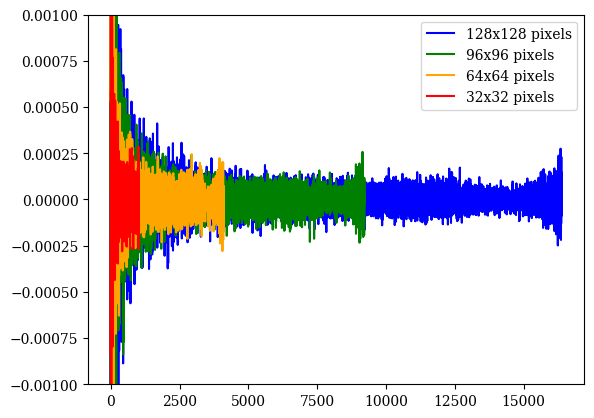

In [91]:
v_img_size = [128, 96, 64, 32]
v_color = ['b', 'green', 'orange', 'red']

for (img_size, color) in zip(v_img_size, v_color):
    plt.plot(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1], color=color, label=f'{img_size}x{img_size} pixels')

ax = plt.gca()
# ax.set_xlim([xmin, xmax])
ax.set_ylim([-1e-3, 1e-3])
plt.legend()


In [92]:
max_x

16384

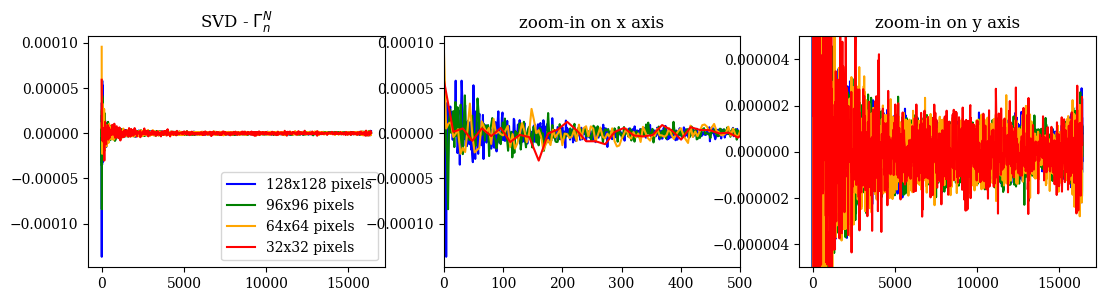

In [93]:
"""
In questo grafico mostro:
1) tutto il grafico
2) zoom su x, ma tutto y
3) zoom su y, ma tutto x

Nota che le dimensioni lungo x sono state "stretchate", in modo che 
i plot combaciassero --> meno pixel => minor risoluzione (frequenza dei dati minore)
"""

noise_level = 5e-3
# max_x = number_of_elements(128)
BOOLEAN_CHECK = True
fig, ax = plt.subplots(1,3)
fig.set_size_inches(13, 3)
# fig.suptitle(r"SVD - Analytic - $\Gamma_n^N$")
ax[0].set_title(r"SVD - $\Gamma_n^N$")
for (img_size, color) in zip(v_img_size, v_color):
    loaded_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
    if BOOLEAN_CHECK:
        max_x = len(loaded_gamma)
        BOOLEAN_CHECK = False
    ax[0].plot(torch.linspace(0, max_x, len(loaded_gamma)), loaded_gamma, color=color, label=f'{img_size}x{img_size} pixels')
    ax[1].plot(torch.linspace(0, max_x, len(loaded_gamma)), loaded_gamma, color=color)
    ax[2].plot(torch.linspace(0, max_x, len(loaded_gamma)), loaded_gamma, color=color)

ax[1].set_title("zoom-in on x axis")
ax[2].set_title("zoom-in on y axis")
    
ax[1].set_xlim([0, 500])
ax[2].set_ylim([-5e-6, 5e-6])
if noise_level==0.5:
    ax[2].set_ylim([-1e-3, 1e-3])
ax[0].legend()
ax[0].ticklabel_format(axis='both', style='scientific', useOffset=False)
ax[1].ticklabel_format(axis='both', style='plain', useOffset=False)
ax[2].ticklabel_format(axis='both', style='plain', useOffset=False)

# plt.ylabel(r"$\Gamma_n^N$")

if SAVE_FIG:
    plt.savefig('./Results/pic002-Gamma.pdf')

plt.show()

In [94]:
v_noise_level[4:0:-1]

[0.5, 0.015, 0.01, 0.005]

In [95]:
# v_noise_level.reverse()
# v_noise_level

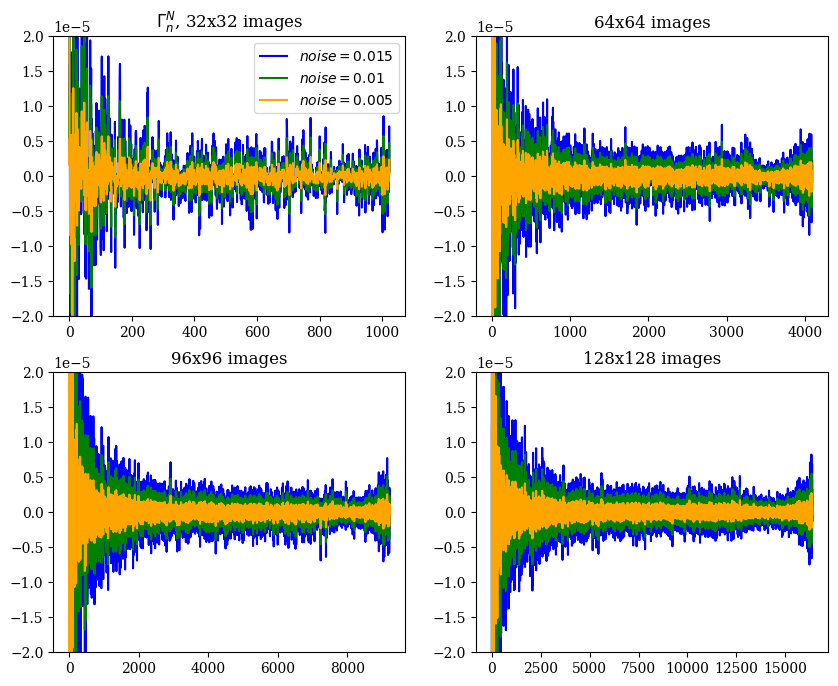

In [96]:
"""
Ripeto quello di sopra, ma ora 
fisso img_size 
vario il noise level 

Nota che le dimensioni lungo x sono state "stretchate", in modo che 
i plot combaciassero --> meno pixel => minor risoluzione (frequenza dei dati minore)
"""
#                    #
################## ###
ZOOM_IN = True   ##  ################# # False True
################# ## #
################### ##


# max_x = number_of_elements(128)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,8)
# fig.suptitle(r"SVD - Analytic - $\Gamma_n^N$")
# ax[0].set_title(r"SVD - Analytic - $\Gamma_n^N$")
for (noise_level, color) in zip(v_noise_level[3:0:-1], v_color):
    loaded_gamma = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[1]
    ax[0,0].plot(load_variables(epochs,  32, noise_level, model, seed, results_folder)[1], color=color, label=f'$noise={noise_level}$')
    ax[0,1].plot(load_variables(epochs,  64, noise_level, model, seed, results_folder)[1], color=color)
    ax[1,0].plot(load_variables(epochs,  96, noise_level, model, seed, results_folder)[1], color=color)
    ax[1,1].plot(load_variables(epochs, 128, noise_level, model, seed, results_folder)[1], color=color)
    
ax[0,0].set_title(r"$\Gamma_n^N$, 32x32 images")
ax[0,1].set_title(r"64x64 images")
ax[1,0].set_title(r"96x96 images")
ax[1,1].set_title(r"128x128 images")
# ax[2].set_title("zoom-in on y axis")
    
if ZOOM_IN:
    ax[0,0].set_ylim([-2e-5, 2e-5])
    ax[0,1].set_ylim([-2e-5, 2e-5])
    ax[1,0].set_ylim([-2e-5, 2e-5])
    ax[1,1].set_ylim([-2e-5, 2e-5])

ax[0,0].legend()

# plt.ylabel(r"$\Gamma_n^N$")
if SAVE_FIG:
    plt.savefig('./Results/pic003-Gamma.pdf')
plt.show()

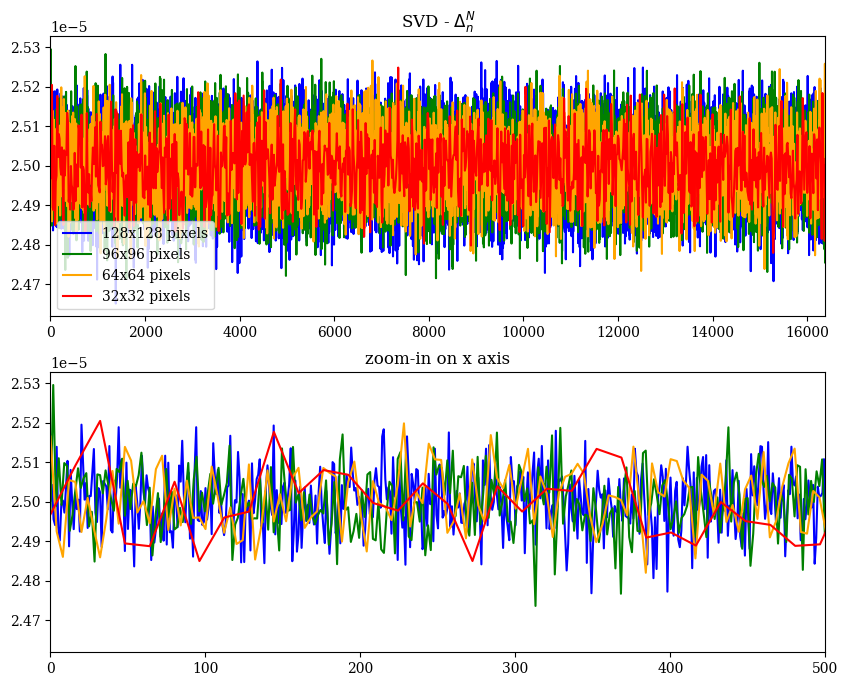

In [97]:
"""
In questo grafico mostro:
1) tutto il grafico
2) zoom su x, ma tutto y

Nota che le dimensioni lungo x sono state "stretchate", in modo che 
i plot combaciassero --> meno pixel => minor risoluzione (frequenza dei dati minore)
"""


# max_x = number_of_elements(128)
BOOLEAN_CHECK = True
fig, ax = plt.subplots(2,1)
fig.set_size_inches(10, 8)
# fig.suptitle(r"SVD - Analytic - $\Gamma_n^N$")
ax[0].set_title(r"SVD - $\Delta_n^N$")
for (img_size, color) in zip(v_img_size, v_color):
    loaded_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]
    if BOOLEAN_CHECK:
        max_x = len(loaded_delta)
        BOOLEAN_CHECK = False
    ax[0].plot(torch.linspace(0, max_x, len(loaded_delta)), loaded_delta, color=color, label=f'{img_size}x{img_size} pixels')
    ax[1].plot(torch.linspace(0, max_x, len(loaded_delta)), loaded_delta, color=color)
    
ax[1].set_title("zoom-in on x axis")
ax[1].set_xlim([0, 500])
ax[0].set_xlim([0, 16384])
ax[0].legend()

# plt.ylabel(r"$\Gamma_n^N$")

if SAVE_FIG:
    plt.savefig('./Results/pic004-Delta.pdf')
plt.show()

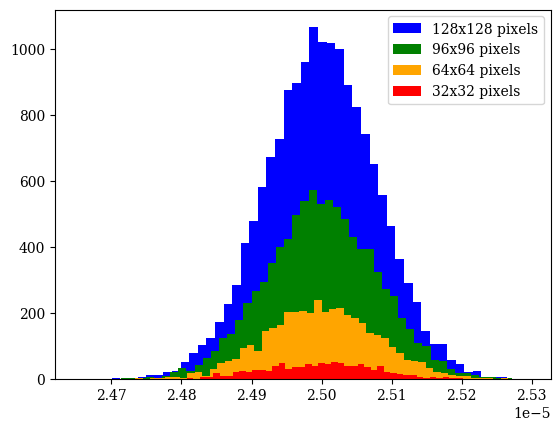

In [98]:
# Forse è più sensato studiarne la distribuzione

for (img_size, color) in zip(v_img_size, v_color):
    loaded_delta = load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2]
    plt.hist(loaded_delta, bins=50, color=color, label=f'{img_size}x{img_size} pixels')

plt.legend()
plt.show()

In [99]:
import numpy as np

In [100]:
#v_L = [1024, 4096, 9216, 16384]

In [101]:
noise_level = 5e-3

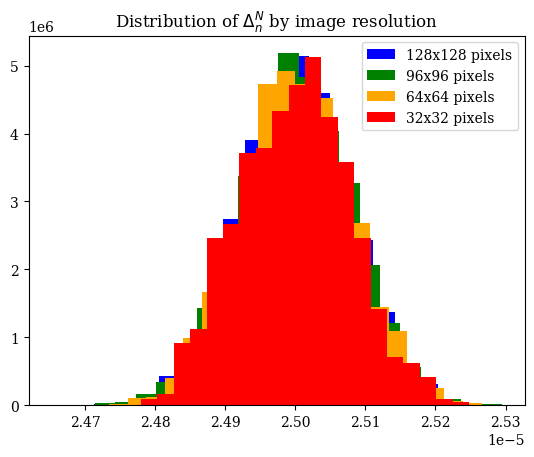

In [102]:
# Riprovo, ma mettendo sull'asse y la percentuale invece del numero di ricorrenze
# Risultato: molto bene! I valori di Delta sono comparabili!

v_img_size = [128, 96, 64, 32]
for (img_size, color) in zip(v_img_size, v_color):
    counts, bins = np.histogram(load_variables(epochs, img_size, noise_level, model, seed, results_folder)[2], bins=20, density=True)
    plt.hist(bins[:-1], bins, weights=counts, color=color, label=f'{img_size}x{img_size} pixels')

plt.legend()
plt.title(r"Distribution of $\Delta_n^N$ by image resolution")
if SAVE_FIG:
    plt.savefig('./Results/pic005-Delta_hist.pdf')
plt.show()

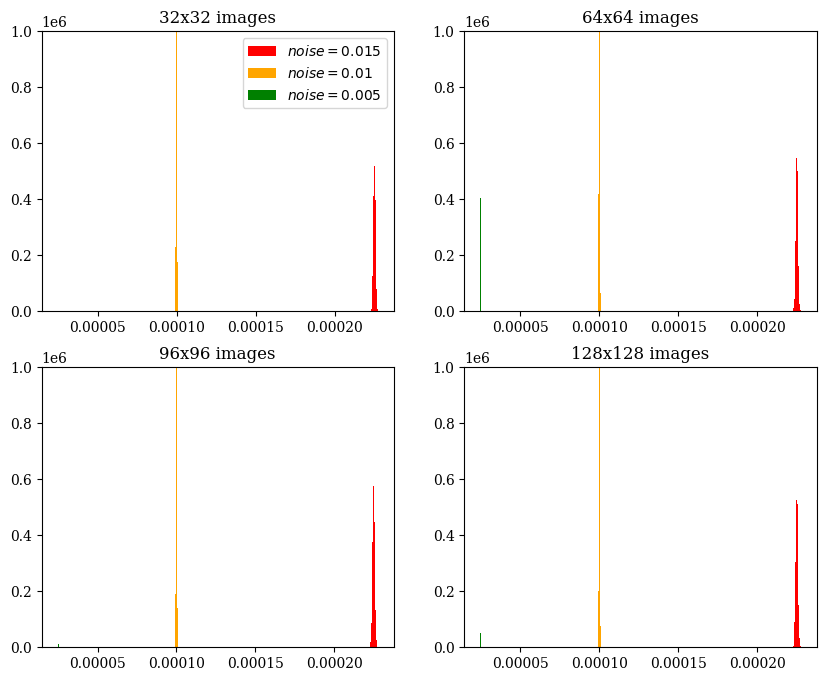

In [103]:
"""
Ripeto quello di sopra, ma ora 
fisso img_size 
vario il noise level 

Risultato: Viene bruttino, eviterei di metterlo
"""
#                    #
################## ###
ZOOM_IN = True   ##  ################# # False True
################# ## #
################### ##


# max_x = number_of_elements(128)
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,8)
# fig.suptitle(r"SVD - Analytic - $\Gamma_n^N$")
# ax[0].set_title(r"SVD - Analytic - $\Gamma_n^N$")
max1 = 0
max2 = 0
max3 = 0
max4 = 0

for (noise_level, color) in zip(v_noise_level[3:0:-1], v_color[3::-1]):
    counts, bins = np.histogram(load_variables(epochs,  32, noise_level, model, seed, results_folder)[2], bins=20, density=True)
    max1 = max(max(counts), max1)
    ax[0,0].hist(bins[:-1], bins, weights=counts, color=color,  label=f'$noise={noise_level}$')

    counts, bins = np.histogram(load_variables(epochs,  64, noise_level, model, seed, results_folder)[2], bins=20, density=True)
    max2 = max(max(counts), max2)
    ax[0,1].hist(bins[:-1], bins, weights=counts, color=color,  label=f'$noise={noise_level}$')
    
    counts, bins = np.histogram(load_variables(epochs,  96, noise_level, model, seed, results_folder)[2], bins=20, density=True)
    max3 = max(max(counts), max3)
    ax[1,0].hist(bins[:-1], bins, weights=counts, color=color,  label=f'$noise={noise_level}$')
    
    counts, bins = np.histogram(load_variables(epochs, 128, noise_level, model, seed, results_folder)[2], bins=20, density=True)
    max4 = max(max(counts), max4)
    ax[1,1].hist(bins[:-1], bins, weights=counts, color=color,  label=f'$noise={noise_level}$')
    
ax[0,0].set_title("32x32 images")
ax[0,1].set_title("64x64 images")
ax[1,0].set_title("96x96 images")
ax[1,1].set_title("128x128 images")
# ax[2].set_title("zoom-in on y axis")
    
if ZOOM_IN:
    ax[0,0].set_ylim([0, 1e6])
    ax[0,1].set_ylim([0, 1e6])
    ax[1,0].set_ylim([0, 1e6])
    ax[1,1].set_ylim([0, 1e6])

ax[0,0].legend()

# plt.ylabel(r"$\Gamma_n^N$")
plt.show()

In [104]:
os.getcwd()

'/data/scratch/ahw696/LearnedRadonFilters-master_2022_11_18'